# Heart Disease Prediction : Data Preprocessing

## Part I : EDA - Exploratory Data Analysis

Conduct an exploratory data analysis on the cardiovascular dataset, especially explore the relationship between heart disease and other features.

[Reference](https://www.kaggle.com/code/vipin07/heart-disease-eda-fe-resam-xgboost)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

Cardiovascular_df = pd.read_csv('data/Raw_data.csv')
Cardiovascular_df.head()

General_Health                  Checkup Exercise Heart_Disease Skin_Cancer  \
0           Poor  Within the past 2 years       No            No          No   
1      Very Good     Within the past year       No           Yes          No   
2      Very Good     Within the past year      Yes            No          No   
3           Poor     Within the past year      Yes           Yes          No   
4           Good     Within the past year       No            No          No   

  Other_Cancer Depression Diabetes Arthritis     Sex Age_Category  \
0           No         No       No       Yes  Female        70-74   
1           No         No      Yes        No  Female        70-74   
2           No         No      Yes        No  Female        60-64   
3           No         No      Yes        No    Male        75-79   
4           No         No       No        No    Male          80+   

   Height_(cm)  Weight_(kg)    BMI Smoking_History  Alcohol_Consumption  \
0        150.0        32.66  14.54             Yes                  0.0   
1        165.0        77.11  28.29              No                  0.0   
2        163.0        88.45  33.47              No                  4.0   
3        180.0        93.44  28.73              No                  0.0   
4        191.0        88.45  24.37             Yes                  0.0   

   Fruit_Consumption  Green_Vegetables_Consumption  FriedPotato_Consumption  
0               30.0                          16.0                     12.0  
1               30.0                           0.0                      4.0  
2               12.0                           3.0                     16.0  
3               30.0                          30.0                      8.0  
4                8.0                           4.0                      0.0

In [3]:
Cardiovascular_df.shape

(308854, 19)

In [4]:
Cardiovascular_df.describe()

Height_(cm)    Weight_(kg)            BMI  Alcohol_Consumption  \
count  308854.000000  308854.000000  308854.000000        308854.000000   
mean      170.615249      83.588655      28.626211             5.096366   
std        10.658026      21.343210       6.522323             8.199763   
min        91.000000      24.950000      12.020000             0.000000   
25%       163.000000      68.040000      24.210000             0.000000   
50%       170.000000      81.650000      27.440000             1.000000   
75%       178.000000      95.250000      31.850000             6.000000   
max       241.000000     293.020000      99.330000            30.000000   

       Fruit_Consumption  Green_Vegetables_Consumption  \
count      308854.000000                 308854.000000   
mean           29.835200                     15.110441   
std            24.875735                     14.926238   
min             0.000000                      0.000000   
25%            12.000000                      4.000000   
50%            30.000000                     12.000000   
75%            30.000000                     20.000000   
max           120.000000                    128.000000   

       FriedPotato_Consumption  
count            308854.000000  
mean                  6.296616  
std                   8.582954  
min                   0.000000  
25%                   2.000000  
50%                   4.000000  
75%                   8.000000  
max                 128.000000

In [5]:
Cardiovascular_df.isnull().sum()

General_Health                  0
Checkup                         0
Exercise                        0
Heart_Disease                   0
Skin_Cancer                     0
Other_Cancer                    0
Depression                      0
Diabetes                        0
Arthritis                       0
Sex                             0
Age_Category                    0
Height_(cm)                     0
Weight_(kg)                     0
BMI                             0
Smoking_History                 0
Alcohol_Consumption             0
Fruit_Consumption               0
Green_Vegetables_Consumption    0
FriedPotato_Consumption         0
dtype: int64

In [6]:
Cardiovascular_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308854 non-null  object 
 1   Checkup                       308854 non-null  object 
 2   Exercise                      308854 non-null  object 
 3   Heart_Disease                 308854 non-null  object 
 4   Skin_Cancer                   308854 non-null  object 
 5   Other_Cancer                  308854 non-null  object 
 6   Depression                    308854 non-null  object 
 7   Diabetes                      308854 non-null  object 
 8   Arthritis                     308854 non-null  object 
 9   Sex                           308854 non-null  object 
 10  Age_Category                  308854 non-null  object 
 11  Height_(cm)                   308854 non-null  float64
 12  Weight_(kg)                   308854 non-nul

In [7]:
Cardiovascular_df.duplicated().sum()


80

In [8]:
sns.set_theme(style='darkgrid', context='talk')

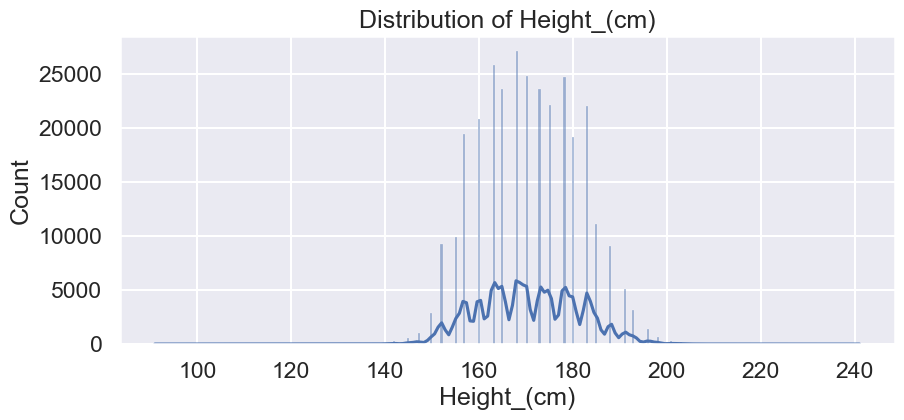

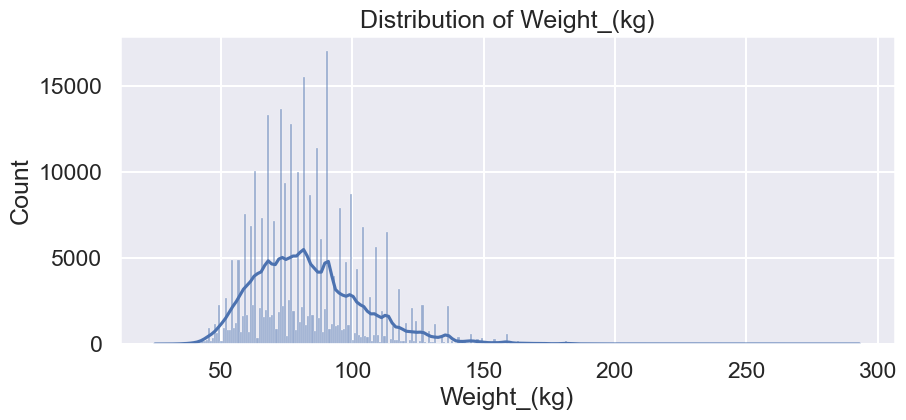

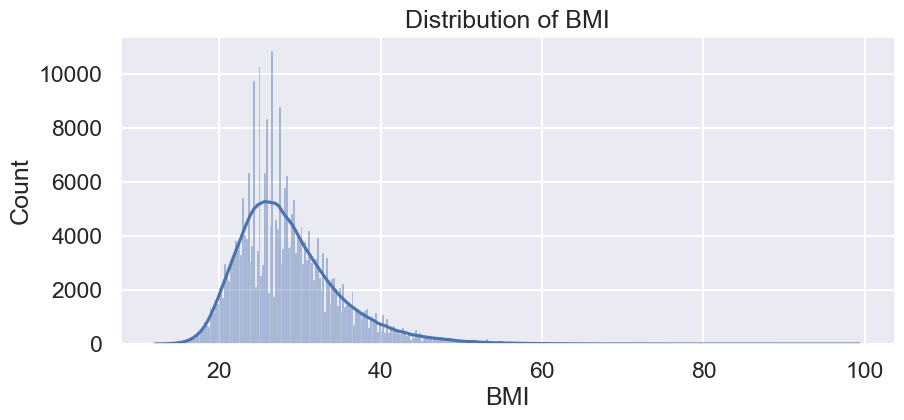

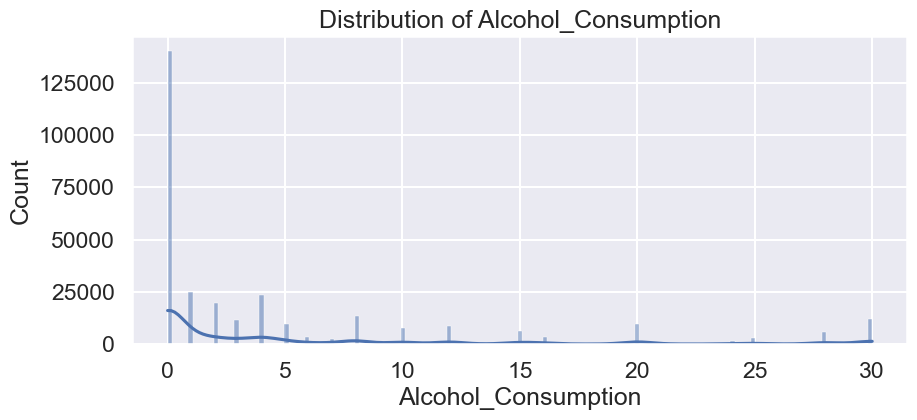

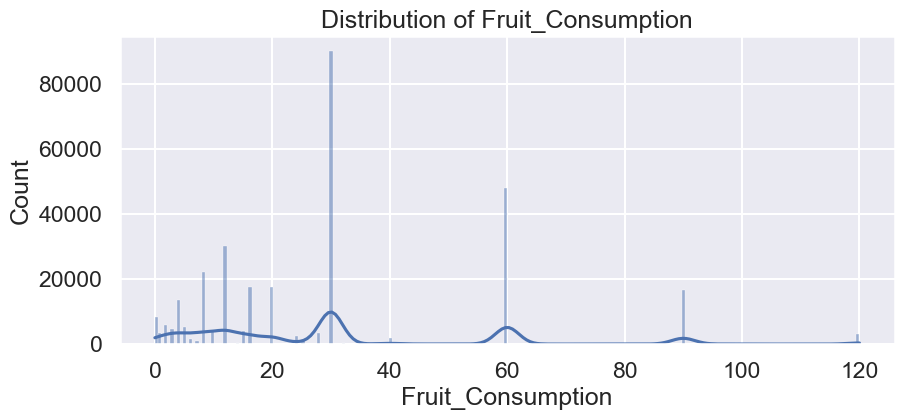

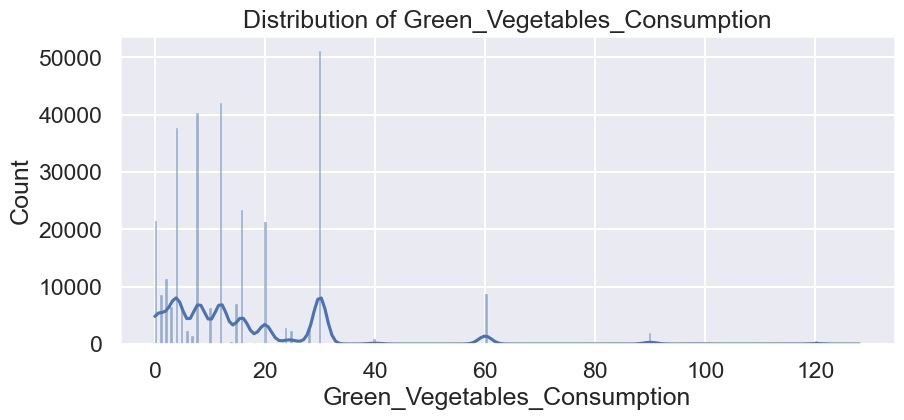

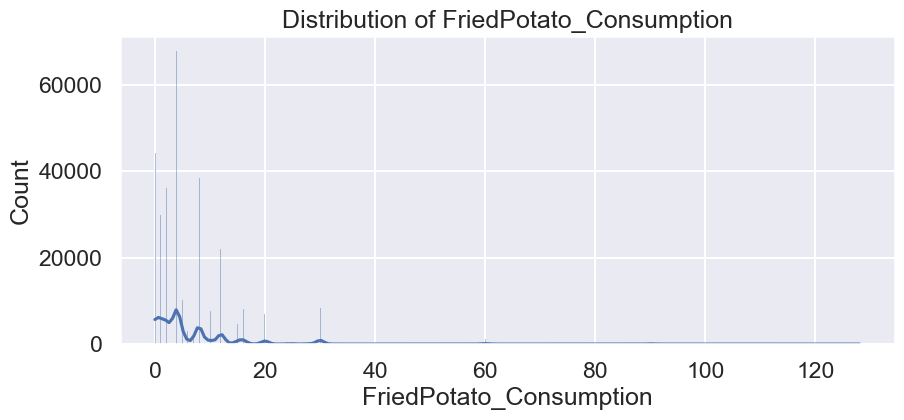

In [9]:
# Univariate Analysis
# Check the distribution of numerical features
numerical_features = ['Height_(cm)', 'Weight_(kg)', 'BMI', 'Alcohol_Consumption', 'Fruit_Consumption', 'Green_Vegetables_Consumption', 'FriedPotato_Consumption']

for feature in numerical_features:
    plt.figure(figsize=(10, 4))
    sns.histplot(data=Cardiovascular_df, x=feature, kde=True)
    plt.title('Distribution of ' + feature)
    plt.show()

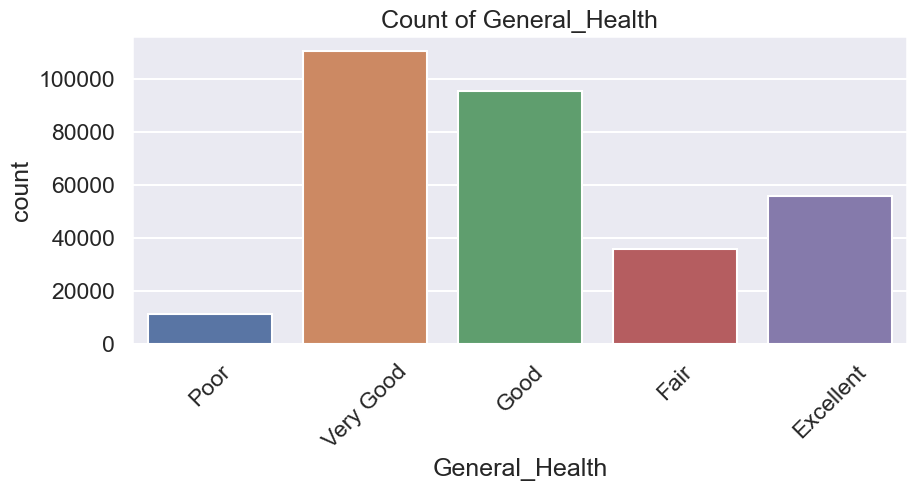

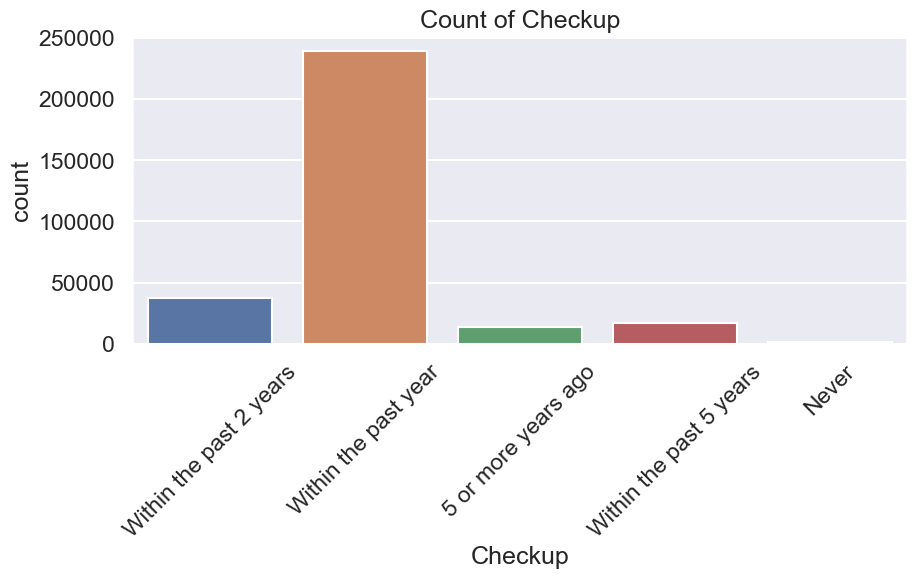

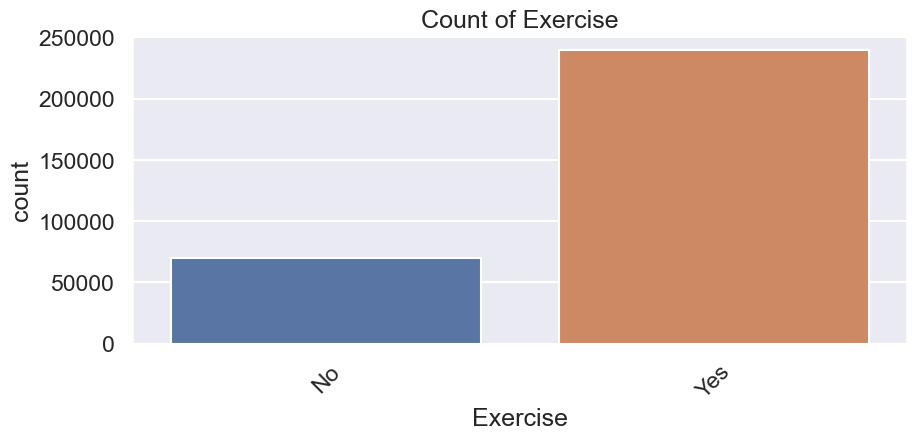

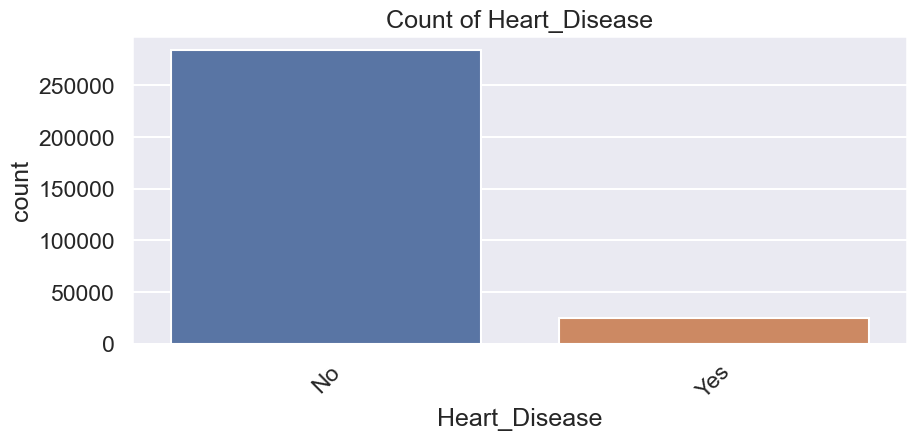

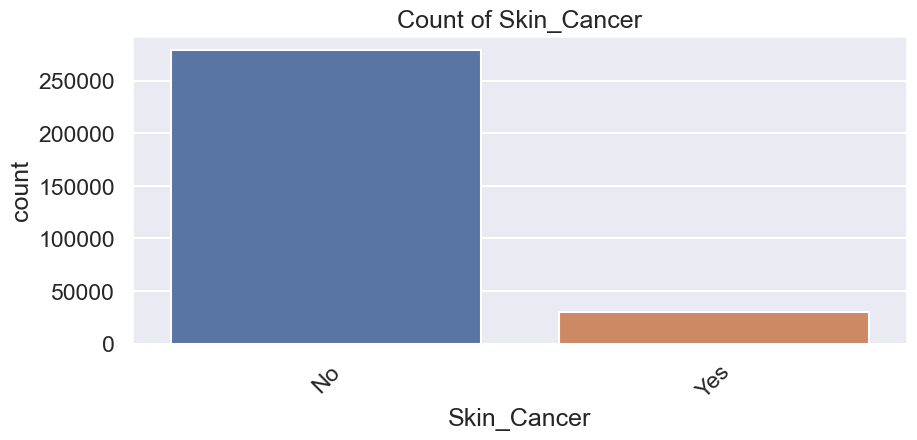

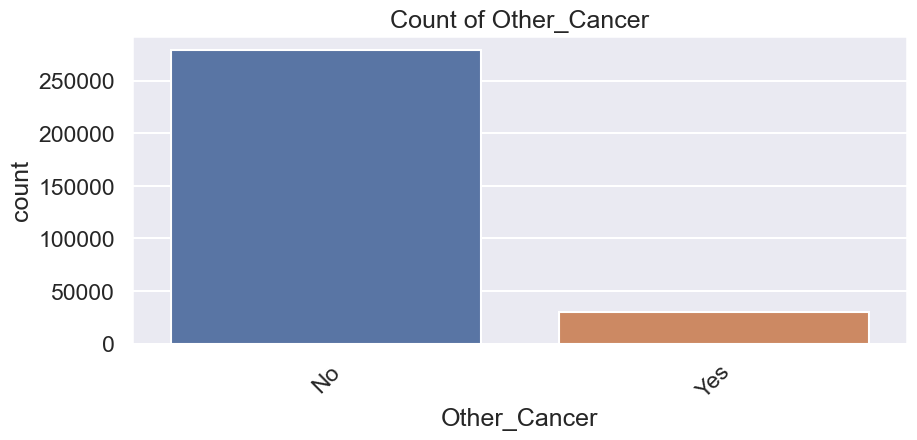

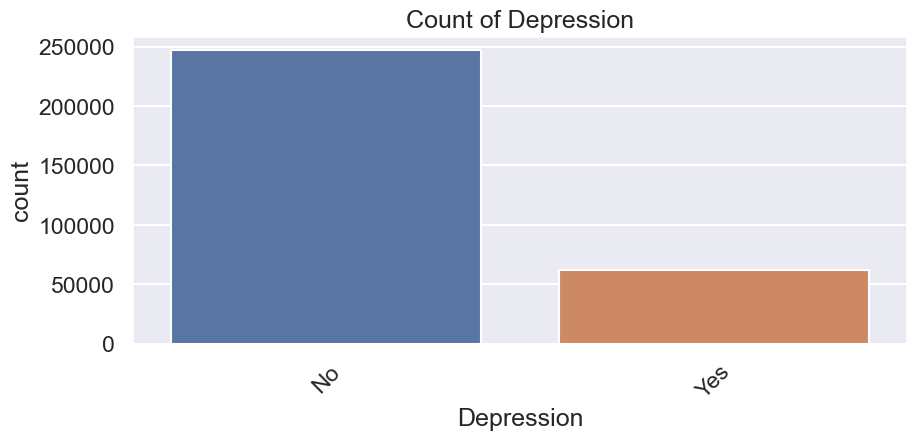

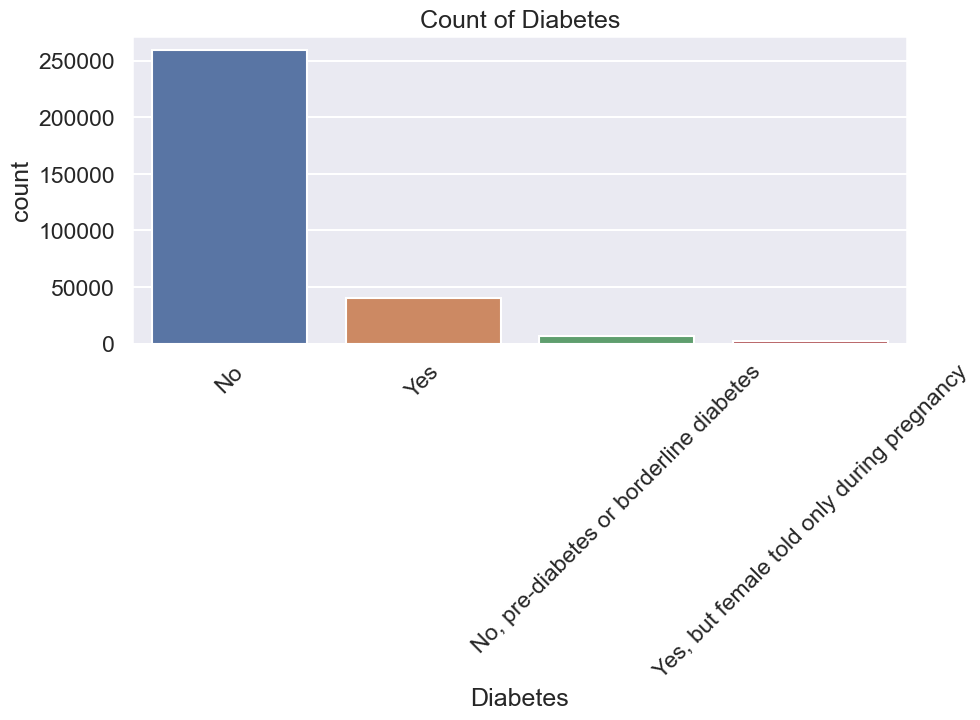

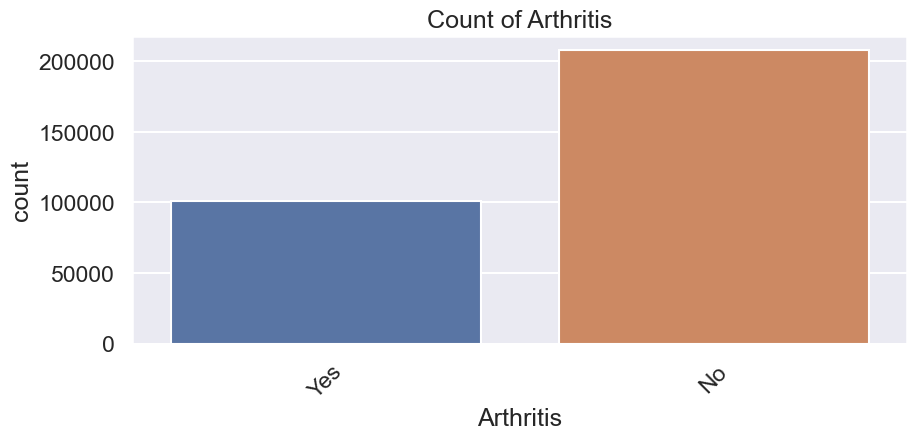

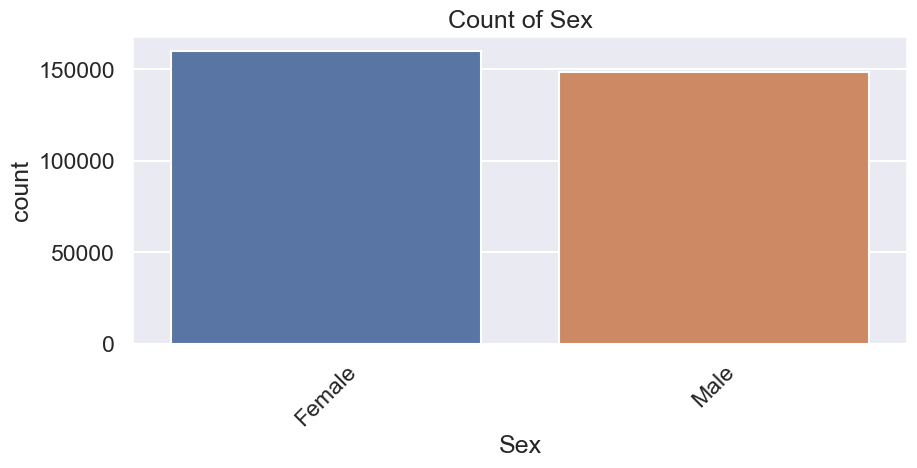

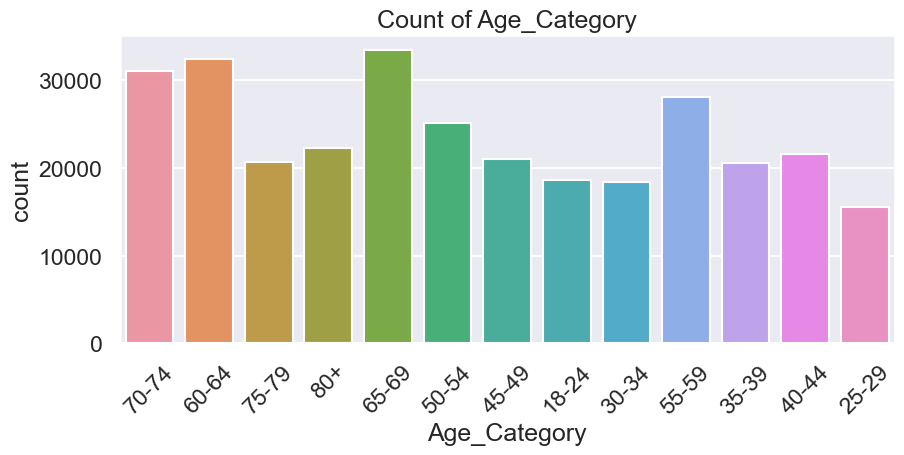

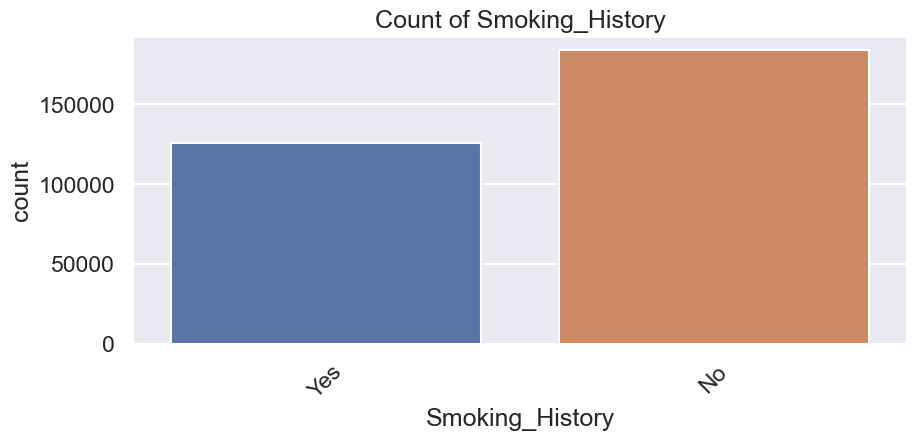

In [11]:
# Check the distribution of categorical features
categorical_features = ['General_Health', 'Checkup', 'Exercise', 'Heart_Disease', 'Skin_Cancer', 'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex', 'Age_Category', 'Smoking_History']

for feature in categorical_features:
    plt.figure(figsize=(10, 4))
    sns.countplot(data=Cardiovascular_df, x=feature)
    plt.title('Count of ' + feature)
    plt.xticks(rotation=45)
    plt.show()

In [12]:
# Cardiovascular_df[categorical_features].value_counts()
for feature in categorical_features:
    print(Cardiovascular_df[feature].value_counts())
    print(50*'-')

General_Health
Very Good    110395
Good          95364
Excellent     55954
Fair          35810
Poor          11331
Name: count, dtype: int64
--------------------------------------------------
Checkup
Within the past year       239371
Within the past 2 years     37213
Within the past 5 years     17442
5 or more years ago         13421
Never                        1407
Name: count, dtype: int64
--------------------------------------------------
Exercise
Yes    239381
No      69473
Name: count, dtype: int64
--------------------------------------------------
Heart_Disease
No     283883
Yes     24971
Name: count, dtype: int64
--------------------------------------------------
Skin_Cancer
No     278860
Yes     29994
Name: count, dtype: int64
--------------------------------------------------
Other_Cancer
No     278976
Yes     29878
Name: count, dtype: int64
--------------------------------------------------
Depression
No     246953
Yes     61901
Name: count, dtype: int64
--------------------

## Heart Disease with other features

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Poor'),
  Text(1, 0, 'Very Good'),
  Text(2, 0, 'Good'),
  Text(3, 0, 'Fair'),
  Text(4, 0, 'Excellent')])

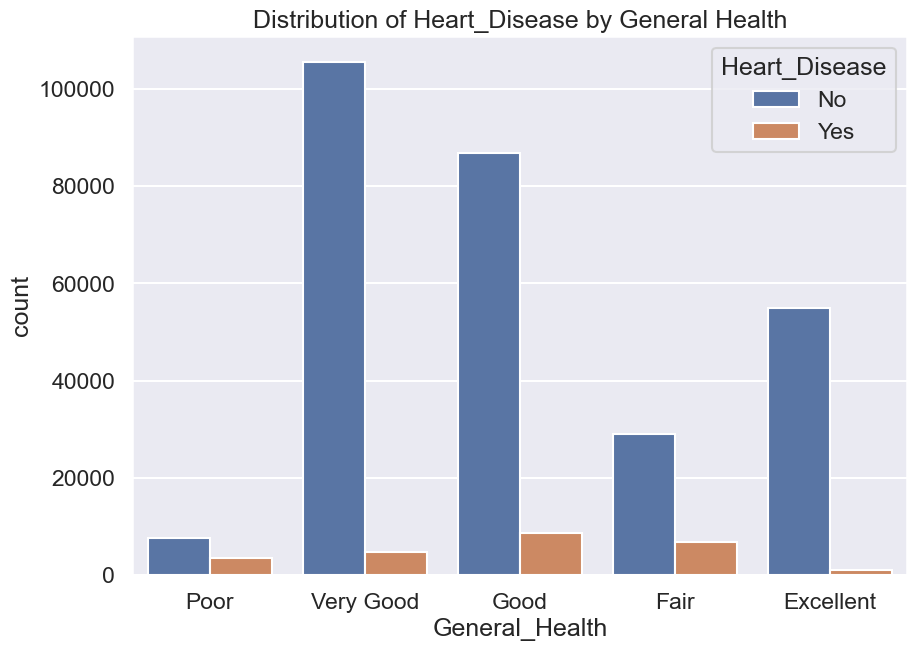

In [13]:
# Analyze the relationship between disease conditions, general health, and age category

disease = 'Heart_Disease'

plt.figure(figsize=(10, 7))
sns.countplot(data=Cardiovascular_df, x='General_Health', hue=disease)
plt.title('Distribution of ' + disease + ' by General Health')
plt.xticks()

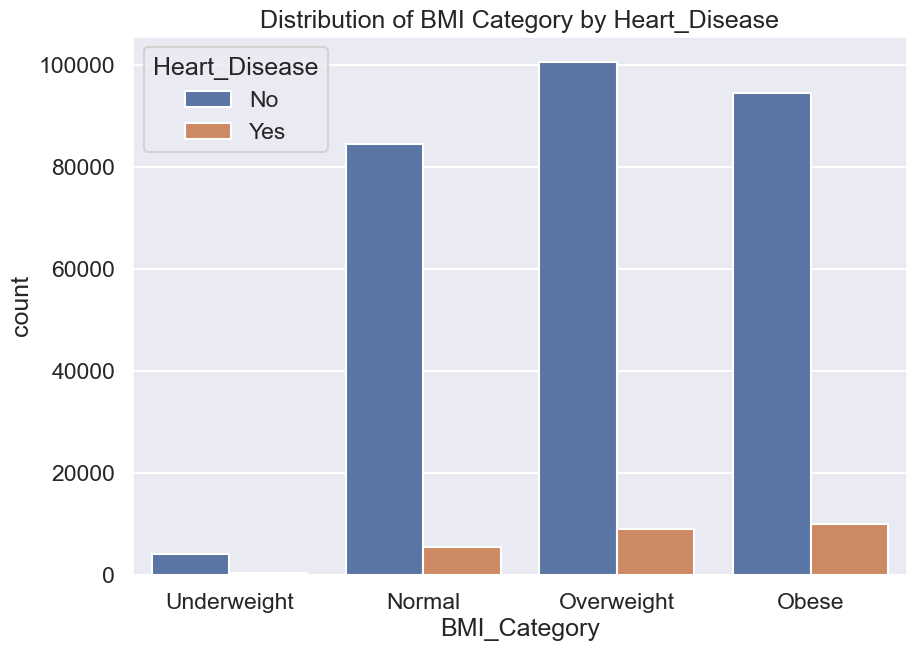

In [15]:
# Analyze the relationship between disease conditions, BMI

# Creating a new BMI category
Cardiovascular_df['BMI_Category'] = pd.cut(Cardiovascular_df['BMI'], bins=[0,18.5,25,30,100], labels=['Underweight','Normal','Overweight','Obese'])

plt.figure(figsize=(10, 7))
sns.countplot(data=Cardiovascular_df, x='BMI_Category', hue='Heart_Disease')
plt.title('Distribution of BMI Category by Heart_Disease')
plt.xticks()
plt.show()



## Convert categorical features to numerically encoded integers

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='darkgrid', context='talk')

In [17]:
# Re-import the dataset
data = pd.read_csv('data/Raw_data.csv')

# Mapping for Diabetes
diabetes_mapping = {
    'No': 0, 
    'No, pre-diabetes or borderline diabetes': 0, 
    'Yes, but female told only during pregnancy': 1,
    'Yes': 1
}
data['Diabetes'] = data['Diabetes'].map(diabetes_mapping)

# One-hot encoding for Sex
data = pd.get_dummies(data, columns=['Sex'], dtype=int)

# Convert remaining categorical variables with "Yes" and "No" values to binary format for correlation computation
binary_columns = ['Heart_Disease', 'Skin_Cancer', 'Other_Cancer', 'Depression', 'Arthritis', 'Smoking_History','Exercise']

for column in binary_columns:
    data[column] = data[column].map({'Yes': 1, 'No': 0})
    
# Ordinal encoding for General_Health, Checkup, Age_Category
general_health_mapping = {
    'Poor': 0,
    'Fair': 1,
    'Good': 2,
    'Very Good': 3,
    'Excellent': 4
}
data['General_Health'] = data['General_Health'].map(general_health_mapping)

checkup_mapping = {
    'Never': 0,
    '5 or more years ago': 1,
    'Within the past 5 years': 2,
    'Within the past 2 years': 3,
    'Within the past year': 4
    
}
data['Checkup'] = data['Checkup'].map(checkup_mapping)


age_category_mapping = {
    '18-24': 0,
    '25-29': 1,
    '30-34': 2,
    '35-39': 3,
    '40-44': 4,
    '45-49': 5,
    '50-54': 6,
    '55-59': 7,
    '60-64': 8,
    '65-69': 9,
    '70-74': 10,
    '75-79': 11,
    '80+': 12
}
data['Age_Category'] = data['Age_Category'].map(age_category_mapping)    
    

# Display the first few rows of the cleaned dataset
data.head()

General_Health  Checkup  Exercise  Heart_Disease  Skin_Cancer  \
0               0        3         0              0            0   
1               3        4         0              1            0   
2               3        4         1              0            0   
3               0        4         1              1            0   
4               2        4         0              0            0   

   Other_Cancer  Depression  Diabetes  Arthritis  Age_Category  Height_(cm)  \
0             0           0         0          1            10        150.0   
1             0           0         1          0            10        165.0   
2             0           0         1          0             8        163.0   
3             0           0         1          0            11        180.0   
4             0           0         0          0            12        191.0   

   Weight_(kg)    BMI  Smoking_History  Alcohol_Consumption  \
0        32.66  14.54                1                  0.0   
1        77.11  28.29                0                  0.0   
2        88.45  33.47                0                  4.0   
3        93.44  28.73                0                  0.0   
4        88.45  24.37                1                  0.0   

   Fruit_Consumption  Green_Vegetables_Consumption  FriedPotato_Consumption  \
0               30.0                          16.0                     12.0   
1               30.0                           0.0                      4.0   
2               12.0                           3.0                     16.0   
3               30.0                          30.0                      8.0   
4                8.0                           4.0                      0.0   

   Sex_Female  Sex_Male  
0           1         0  
1           1         0  
2           1         0  
3           0         1  
4           0         1

In [18]:
# Remove duplicate rows
data = data.drop_duplicates()
data

General_Health  Checkup  Exercise  Heart_Disease  Skin_Cancer  \
0                    0        3         0              0            0   
1                    3        4         0              1            0   
2                    3        4         1              0            0   
3                    0        4         1              1            0   
4                    2        4         0              0            0   
...                ...      ...       ...            ...          ...   
308849               3        4         1              0            0   
308850               1        2         1              0            0   
308851               3        1         1              0            0   
308852               3        4         1              0            0   
308853               4        4         1              0            0   

        Other_Cancer  Depression  Diabetes  Arthritis  Age_Category  \
0                  0           0         0          1            10   
1                  0           0         1          0            10   
2                  0           0         1          0             8   
3                  0           0         1          0            11   
4                  0           0         0          0            12   
...              ...         ...       ...        ...           ...   
308849             0           0         0          0             1   
308850             0           0         1          0             9   
308851             0           1         1          0             2   
308852             0           0         0          0             9   
308853             0           0         0          0             5   

        Height_(cm)  Weight_(kg)    BMI  Smoking_History  Alcohol_Consumption  \
0             150.0        32.66  14.54                1                  0.0   
1             165.0        77.11  28.29                0                  0.0   
2             163.0        88.45  33.47                0                  4.0   
3             180.0        93.44  28.73                0                  0.0   
4             191.0        88.45  24.37                1                  0.0   
...             ...          ...    ...              ...                  ...   
308849        168.0        81.65  29.05                0                  4.0   
308850        180.0        69.85  21.48                0                  8.0   
308851        157.0        61.23  24.69                1                  4.0   
308852        183.0        79.38  23.73                0                  3.0   
308853        160.0        81.19  31.71                0                  1.0   

        Fruit_Consumption  Green_Vegetables_Consumption  \
0                    30.0                          16.0   
1                    30.0                           0.0   
2                    12.0                           3.0   
3                    30.0                          30.0   
4                     8.0                           4.0   
...                   ...                           ...   
308849               30.0                           8.0   
308850               15.0                          60.0   
308851               40.0                           8.0   
308852               30.0                          12.0   
308853                5.0                          12.0   

        FriedPotato_Consumption  Sex_Female  Sex_Male  
0                          12.0           1         0  
1                           4.0           1         0  
2                          16.0           1         0  
3                           8.0           0         1  
4                           0.0           0         1  
...                         ...         ...       ...  
308849                      0.0           0         1  
308850                      4.0           0         1  
308851                      4.0           1         0  
308852                      0.0     

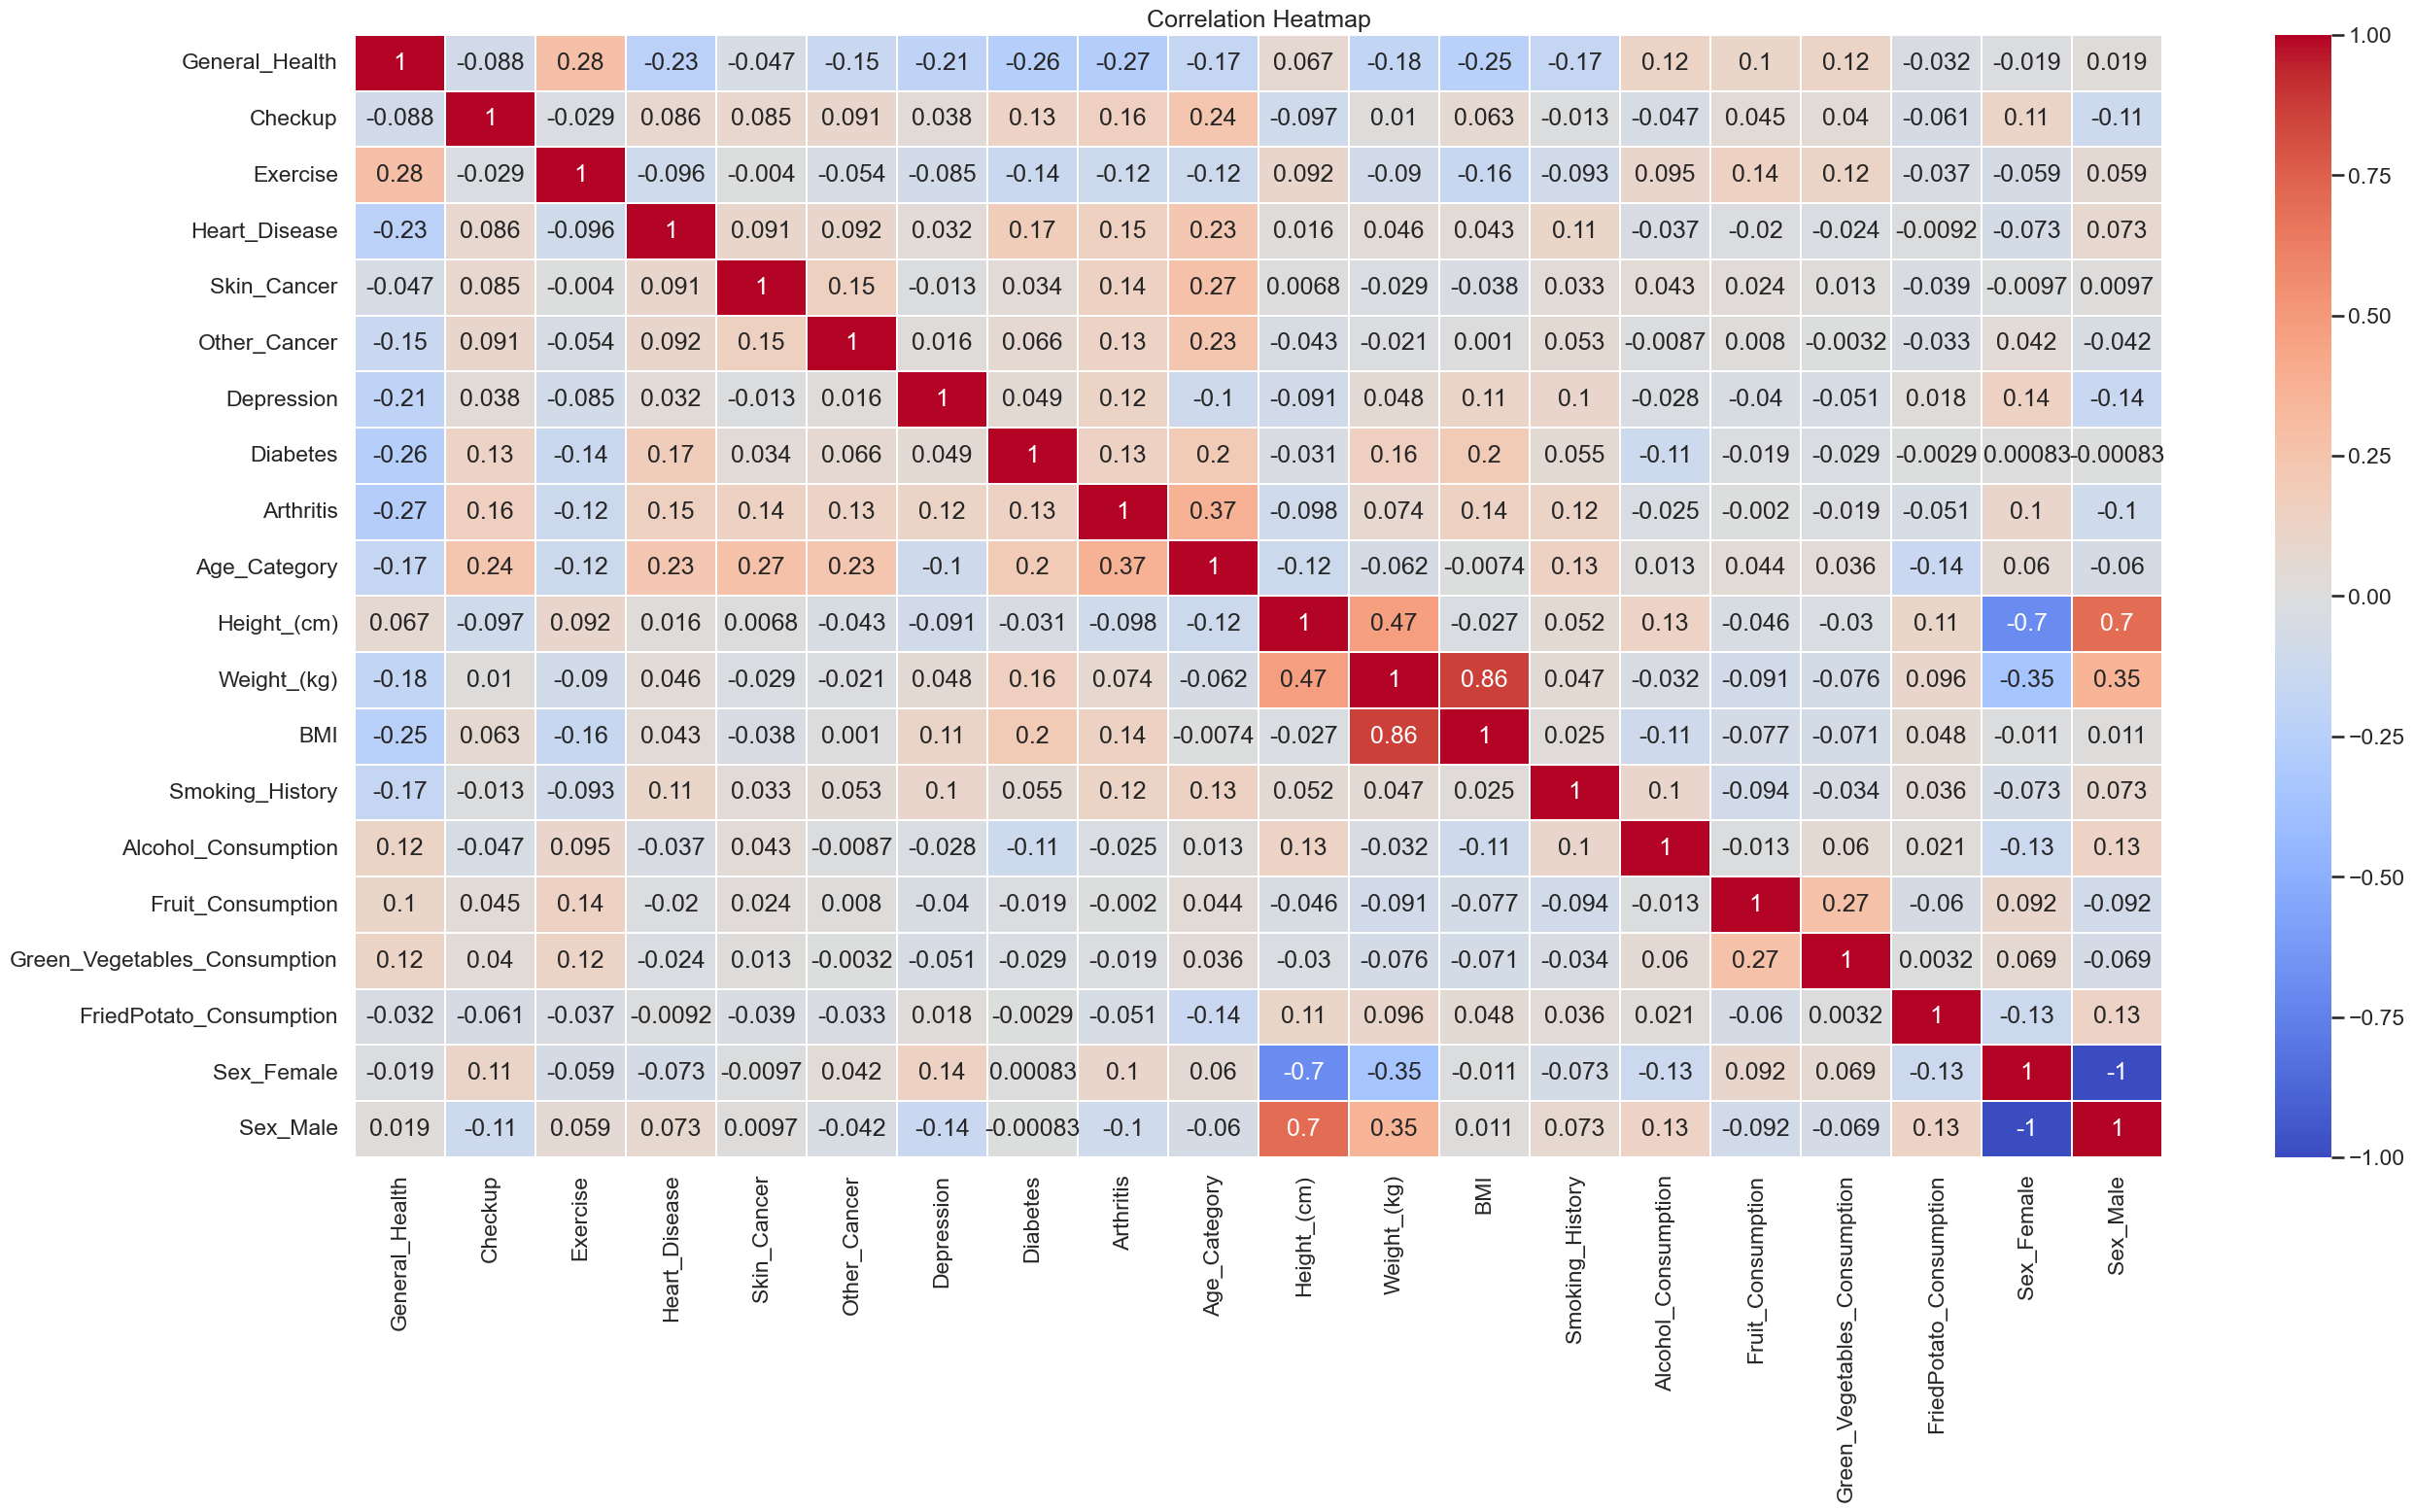

In [19]:
# Plot correlation heatmap using Seaborn
plt.figure(figsize=(30, 15))
correlation = data.corr()
sns.heatmap(correlation, annot=True, linewidths=.2, cmap='coolwarm',  center=0)

plt.title('Correlation Heatmap')
plt.show()

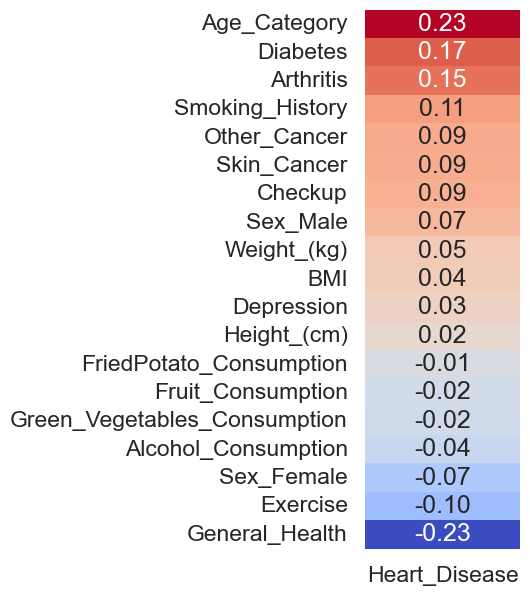

In [20]:
# Compute the correlation of each feature with the disease variables
disease_variable = ['Heart_Disease']
plt.figure(figsize=(2,7))

target_corr = correlation[disease_variable].drop(disease_variable)
target_corr_sorted = target_corr.sort_values(disease_variable, ascending=False)
sns.heatmap(target_corr_sorted, cmap="coolwarm", annot=True, fmt='.2f',cbar=False)
plt.show()


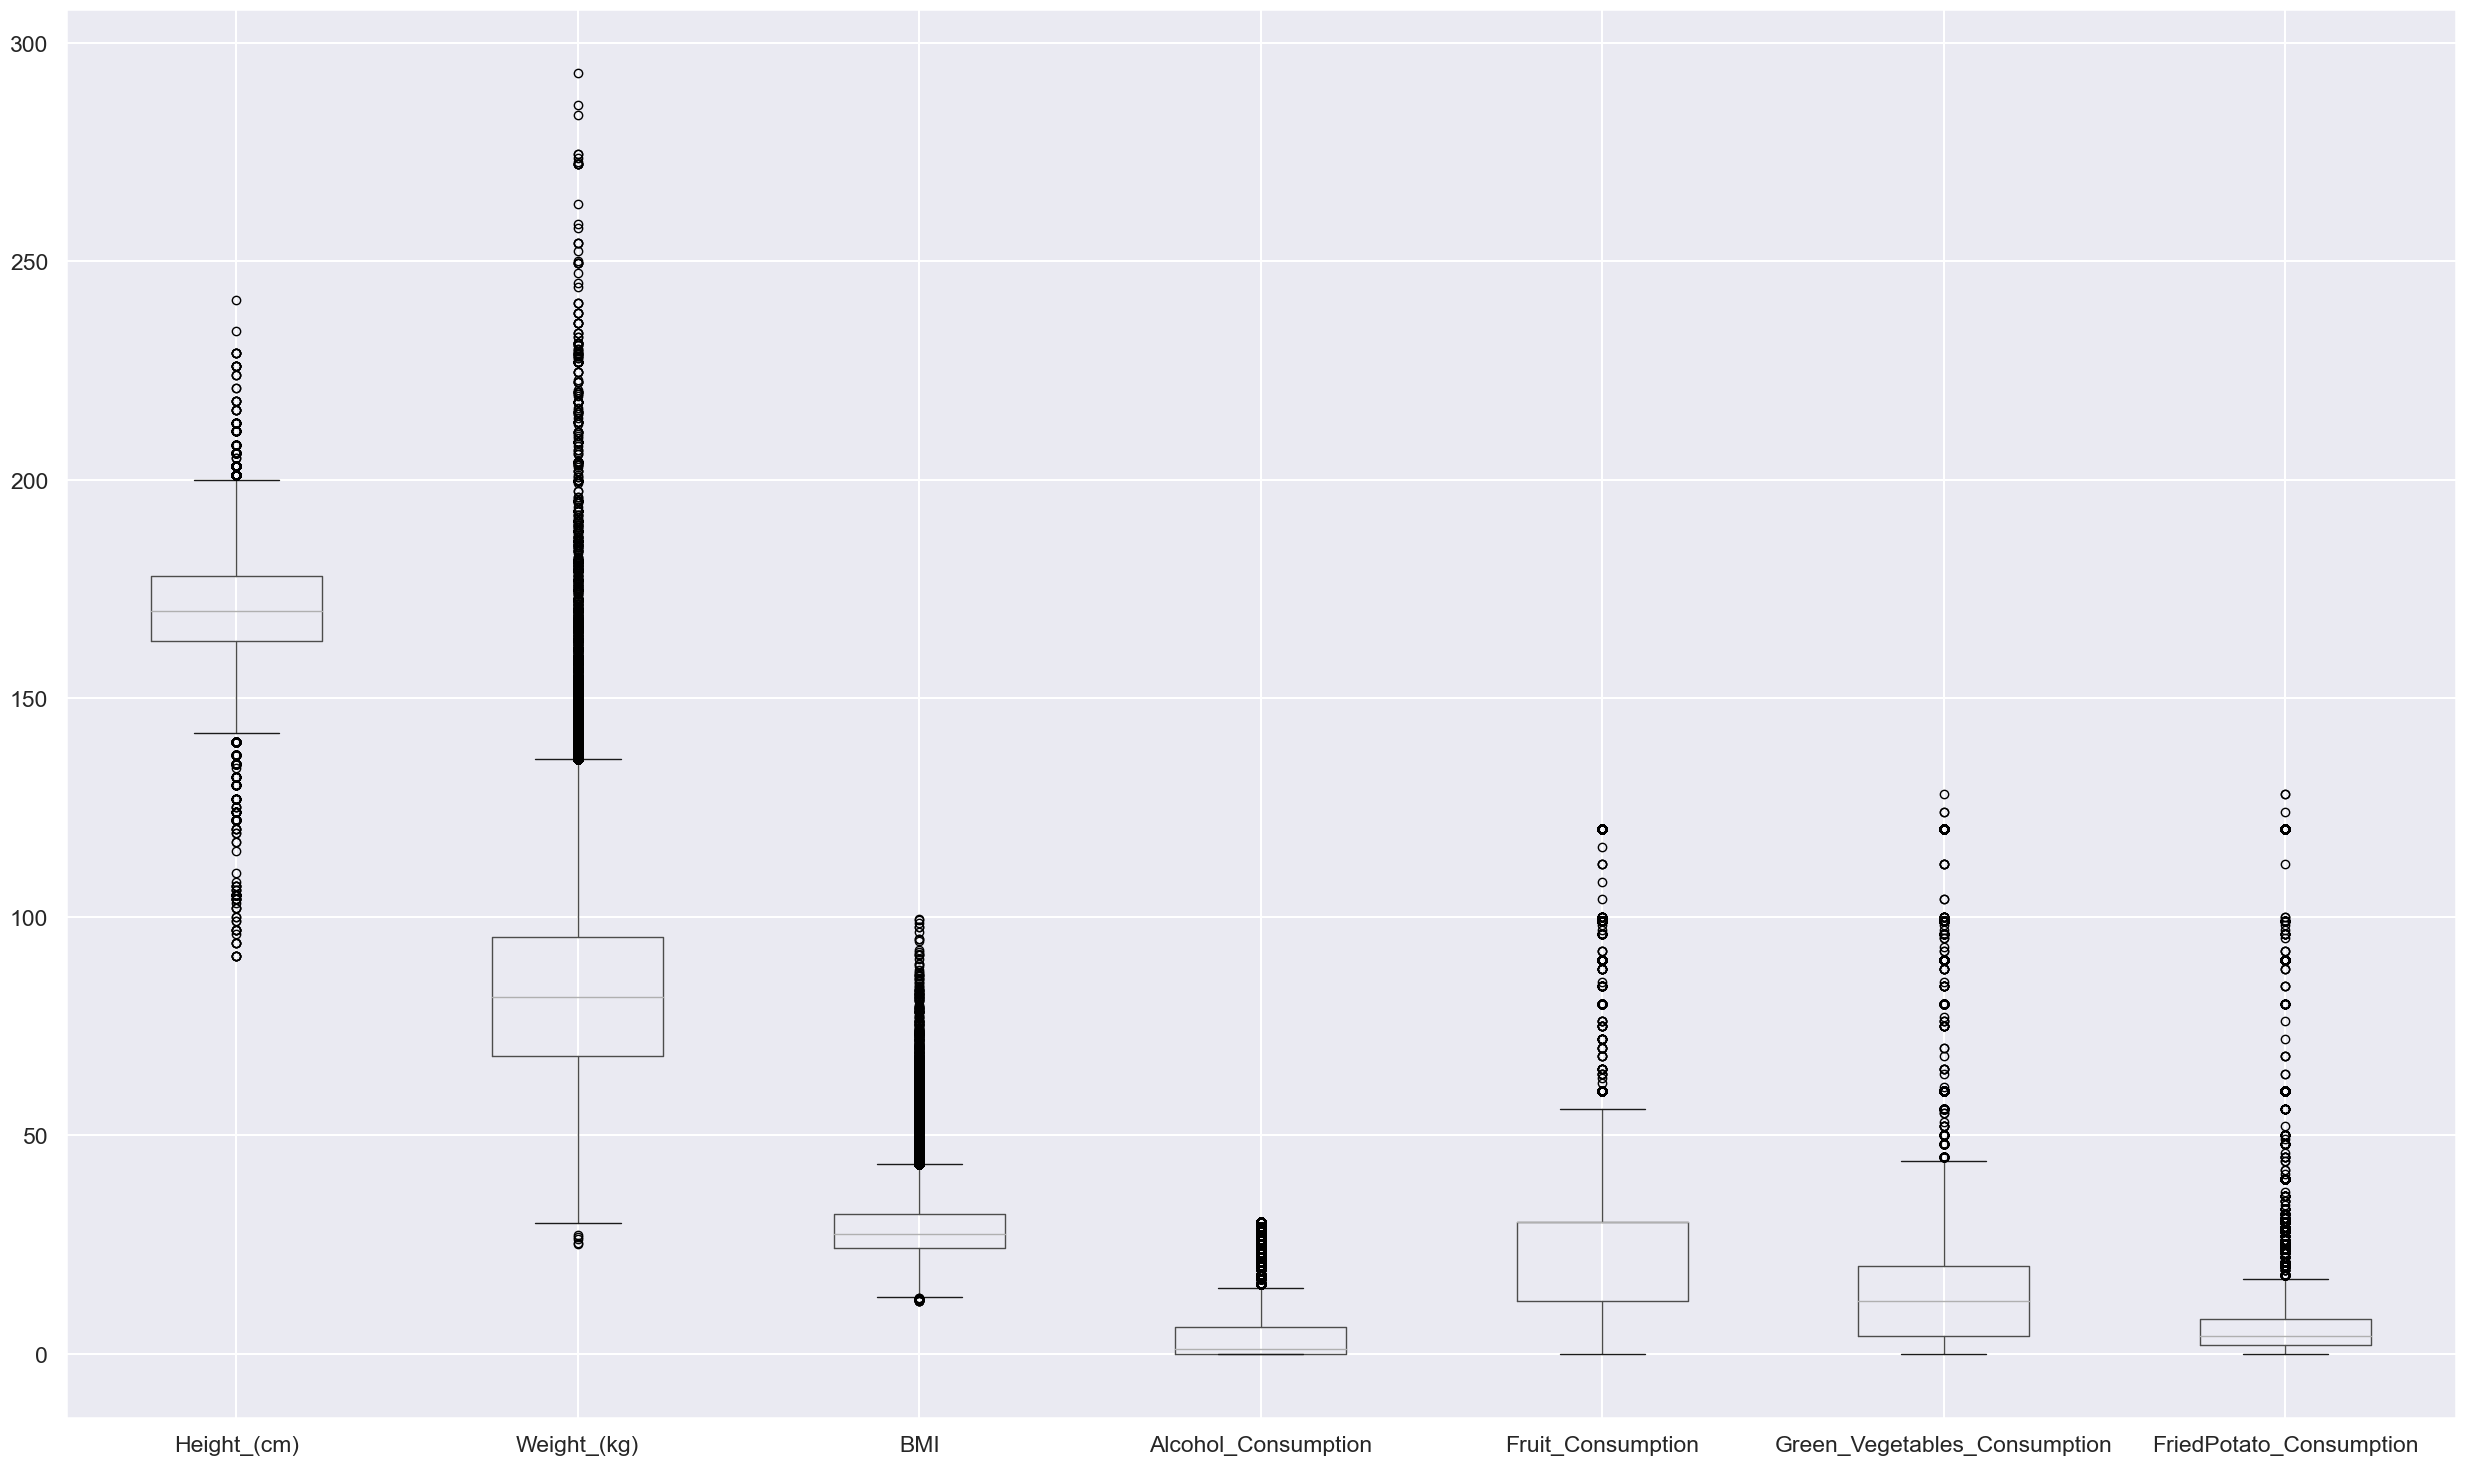

In [21]:
# List of numerical columns
numerical_cols = ['Height_(cm)', 'Weight_(kg)', 'BMI', 'Alcohol_Consumption', 
                  'Fruit_Consumption', 'Green_Vegetables_Consumption', 
                  'FriedPotato_Consumption']


plt.rcParams['figure.figsize'] = (25, 15)

data[numerical_cols].boxplot()

plt.tight_layout()
plt.show()

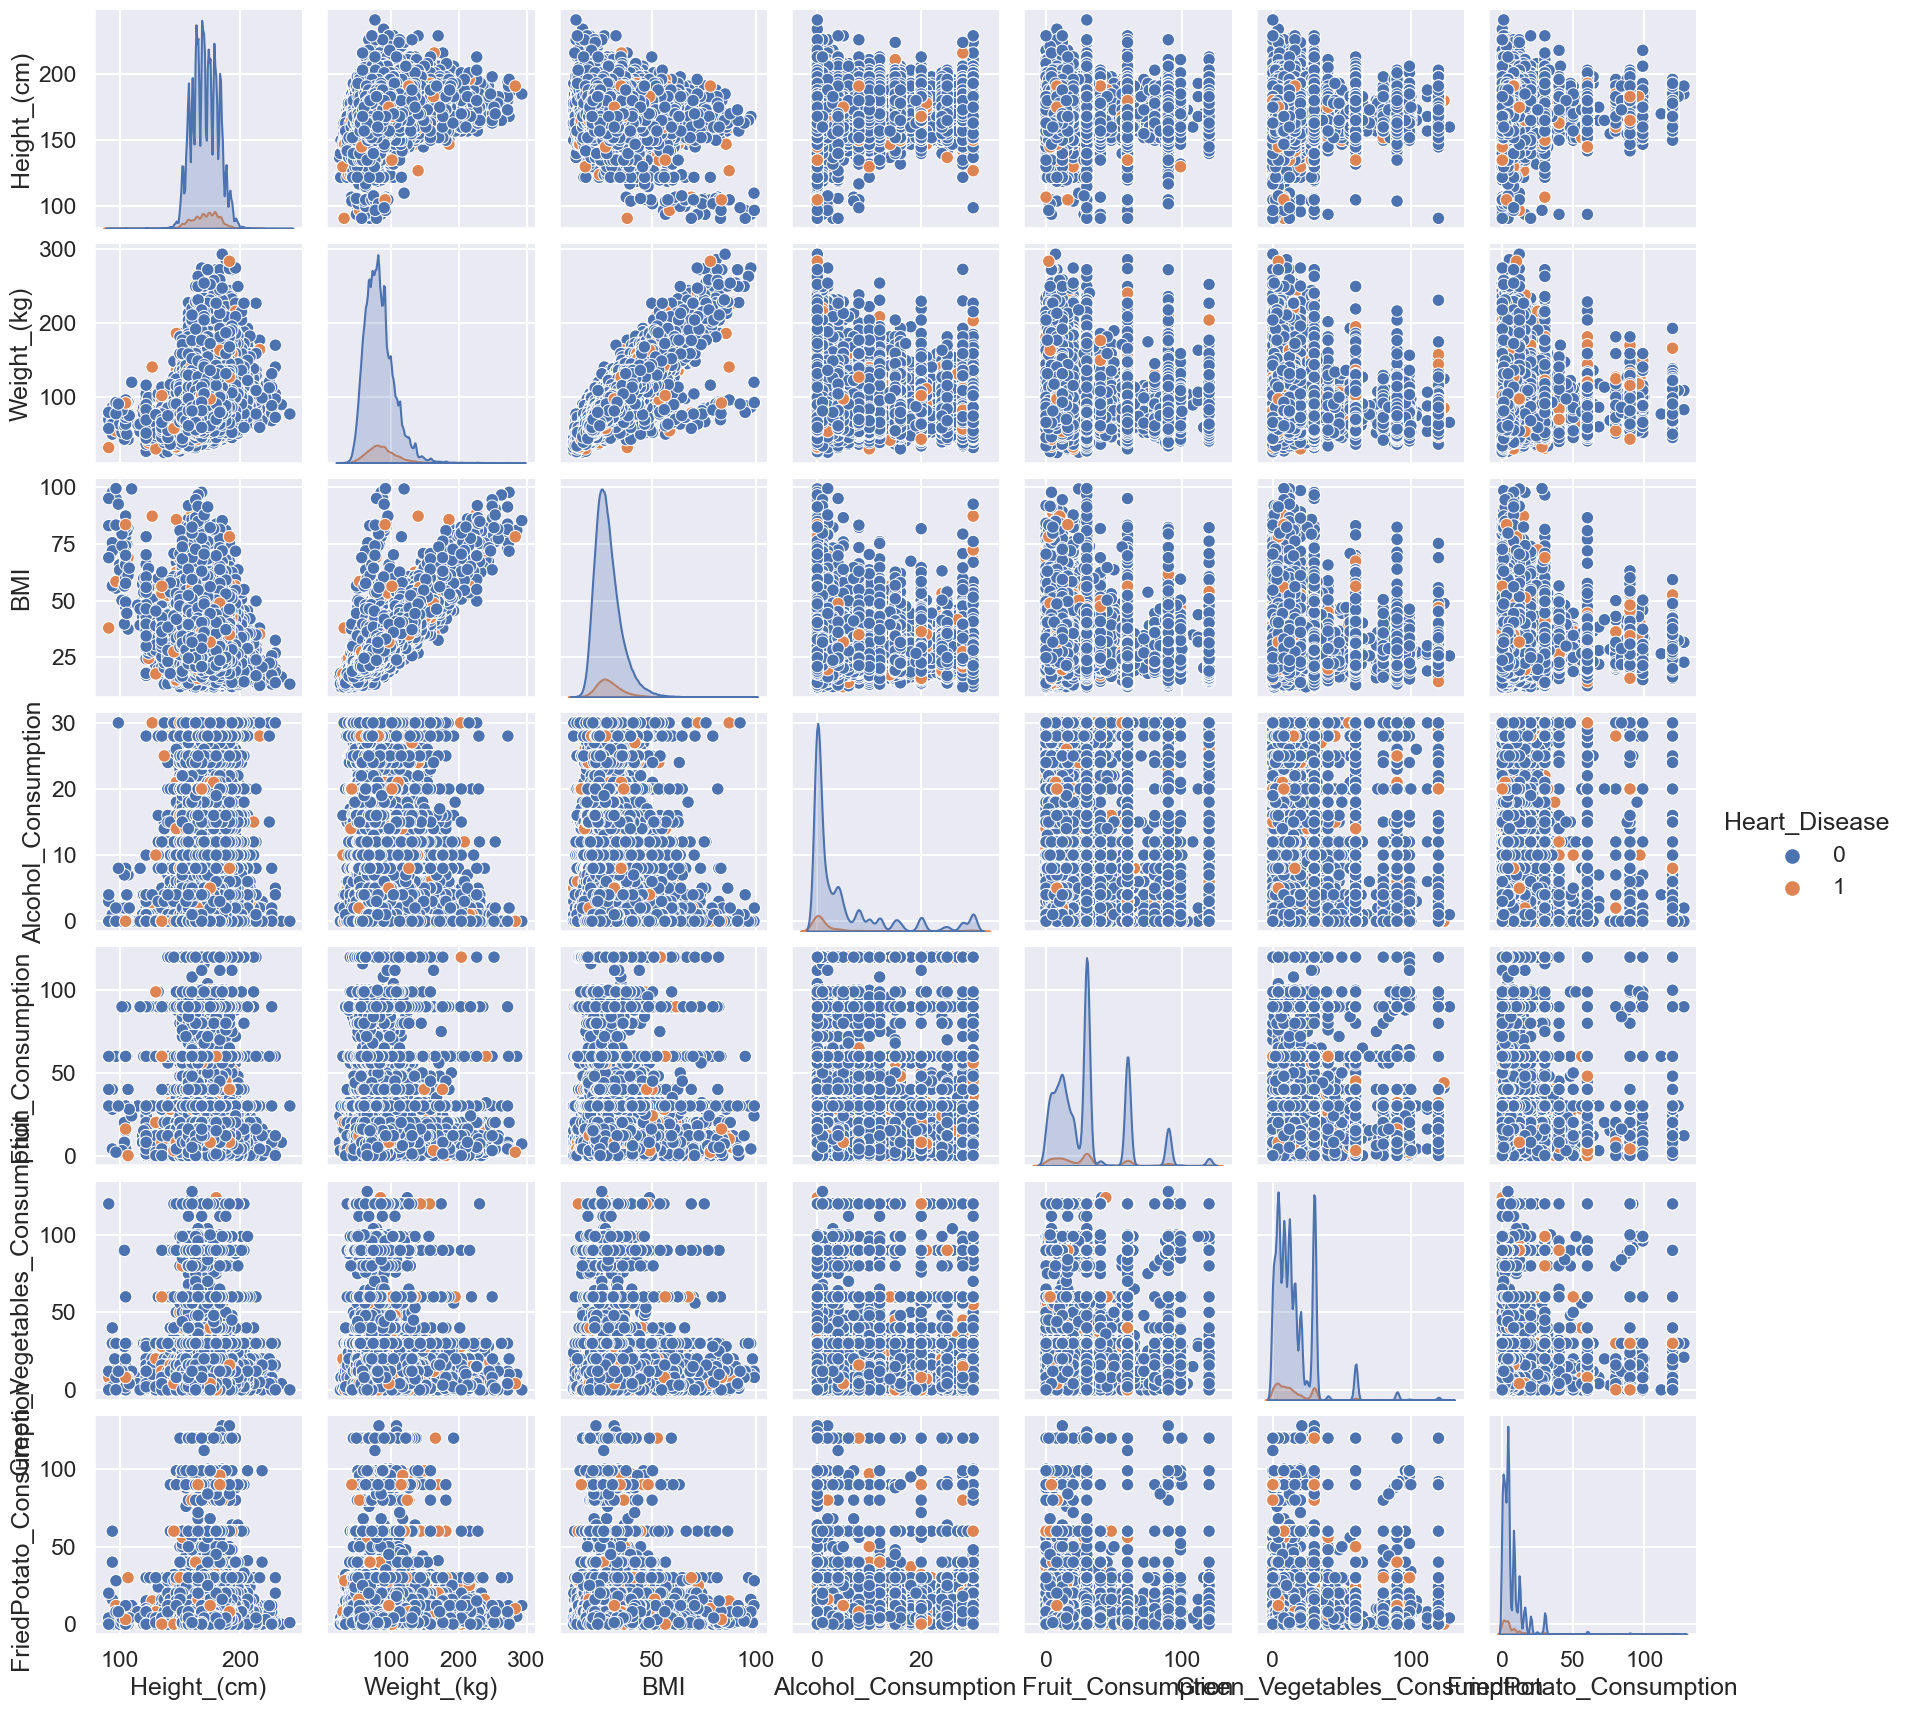

In [19]:

num_dataframe = data[['Heart_Disease'] + numerical_cols]
sns.pairplot(num_dataframe, hue="Heart_Disease")
plt.show()



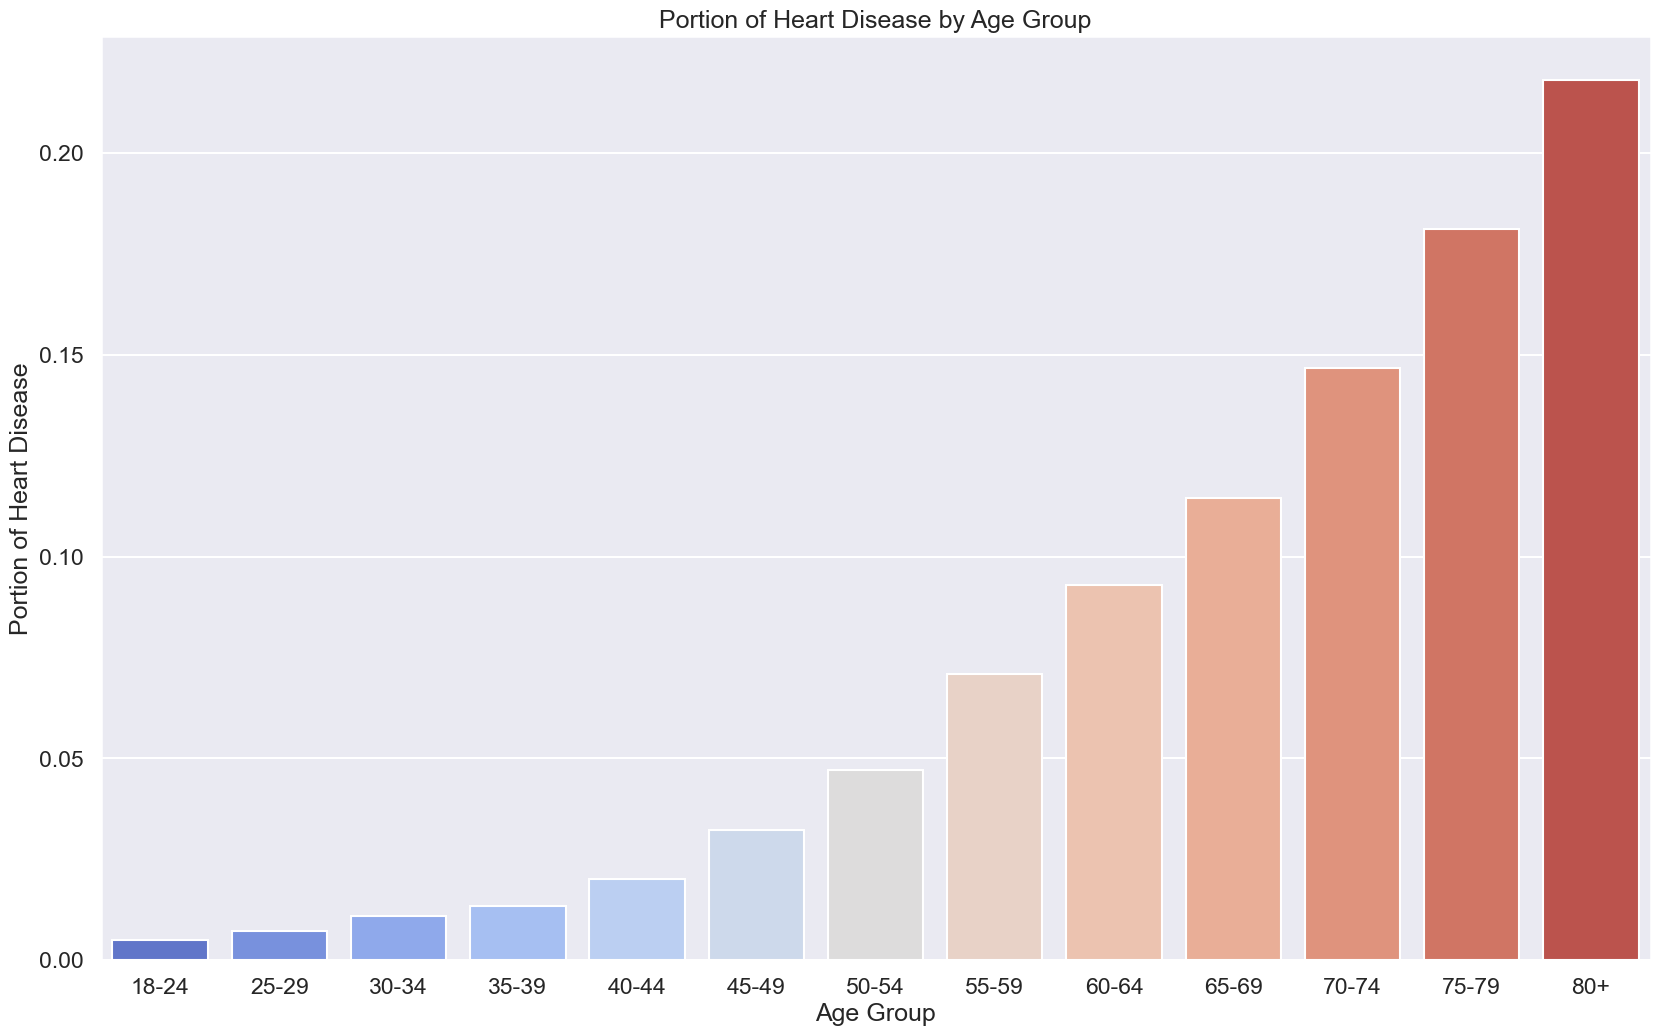

In [22]:
ordered_categories = ['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80+']
portion_df = data.groupby('Age_Category')['Heart_Disease'].mean().reset_index()

plt.figure(figsize=(20,12))
sns.barplot(data=portion_df, x='Age_Category', y='Heart_Disease', palette = "coolwarm")
custom_xticklabels = ordered_categories
plt.xticks(ticks=range(len(custom_xticklabels)), labels=custom_xticklabels)
plt.title("Portion of Heart Disease by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Portion of Heart Disease")
plt.show()



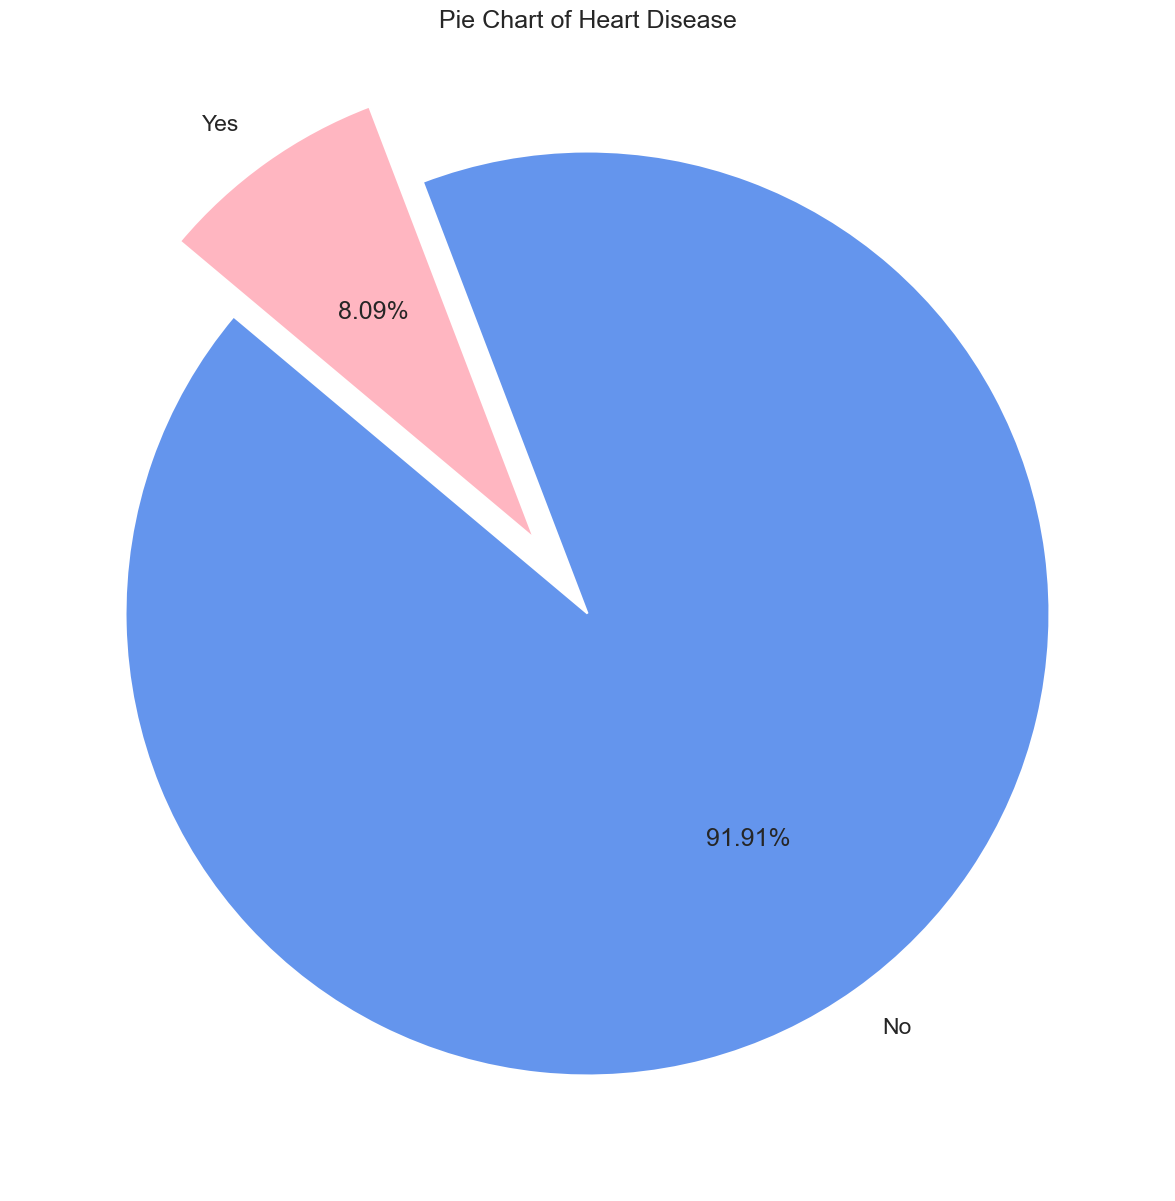

In [27]:
custom_xticklabels = ['No', 'Yes']
selected_values = data[data['Heart_Disease'].isin([0, 1])]
value_counts = selected_values['Heart_Disease'].value_counts()
myexplode = [0, 0.2]

plt.pie(value_counts, labels=custom_xticklabels, autopct='%1.2f%%', startangle=140, colors=['CornflowerBlue', 'lightpink'], explode = myexplode)
plt.title("Pie Chart of Heart Disease")
plt.savefig('output/pie.jpeg')   

In [24]:
data.to_csv('./data/numeric_data.csv', sep=",", index=False)

# Part II : Preprocessing & Feature Engineering

Perform preprocessing on the given dataset
- Scaling 
- PCA


In [28]:
data

General_Health  Checkup  Exercise  Heart_Disease  Skin_Cancer  \
0                    0        3         0              0            0   
1                    3        4         0              1            0   
2                    3        4         1              0            0   
3                    0        4         1              1            0   
4                    2        4         0              0            0   
...                ...      ...       ...            ...          ...   
308849               3        4         1              0            0   
308850               1        2         1              0            0   
308851               3        1         1              0            0   
308852               3        4         1              0            0   
308853               4        4         1              0            0   

        Other_Cancer  Depression  Diabetes  Arthritis  Age_Category  \
0                  0           0         0          1            10   
1                  0           0         1          0            10   
2                  0           0         1          0             8   
3                  0           0         1          0            11   
4                  0           0         0          0            12   
...              ...         ...       ...        ...           ...   
308849             0           0         0          0             1   
308850             0           0         1          0             9   
308851             0           1         1          0             2   
308852             0           0         0          0             9   
308853             0           0         0          0             5   

        Height_(cm)  Weight_(kg)    BMI  Smoking_History  Alcohol_Consumption  \
0             150.0        32.66  14.54                1                  0.0   
1             165.0        77.11  28.29                0                  0.0   
2             163.0        88.45  33.47                0                  4.0   
3             180.0        93.44  28.73                0                  0.0   
4             191.0        88.45  24.37                1                  0.0   
...             ...          ...    ...              ...                  ...   
308849        168.0        81.65  29.05                0                  4.0   
308850        180.0        69.85  21.48                0                  8.0   
308851        157.0        61.23  24.69                1                  4.0   
308852        183.0        79.38  23.73                0                  3.0   
308853        160.0        81.19  31.71                0                  1.0   

        Fruit_Consumption  Green_Vegetables_Consumption  \
0                    30.0                          16.0   
1                    30.0                           0.0   
2                    12.0                           3.0   
3                    30.0                          30.0   
4                     8.0                           4.0   
...                   ...                           ...   
308849               30.0                           8.0   
308850               15.0                          60.0   
308851               40.0                           8.0   
308852               30.0                          12.0   
308853                5.0                          12.0   

        FriedPotato_Consumption  Sex_Female  Sex_Male  
0                          12.0           1         0  
1                           4.0           1         0  
2                          16.0           1         0  
3                           8.0           0         1  
4                           0.0           0         1  
...                         ...         ...       ...  
308849                      0.0           0         1  
308850                      4.0           0         1  
308851                      4.0           1         0  
308852                      0.0     

In [29]:
# Scaling
from sklearn.preprocessing import StandardScaler

columns_to_exclude = ['Heart_Disease']
columns_features =  [col for col in data.columns if col not in columns_to_exclude]
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(data[columns_features]))

In [30]:
df_scaled

0         1         2         3         4         5         6   \
0      -2.453624 -0.757981 -1.855999 -0.327999 -0.327302 -0.500733 -0.401235   
1       0.455490  0.468728 -1.855999 -0.327999 -0.327302 -0.500733  2.492304   
2       0.455490  0.468728  0.538794 -0.327999 -0.327302 -0.500733  2.492304   
3      -2.453624  0.468728  0.538794 -0.327999 -0.327302 -0.500733  2.492304   
4      -0.514215  0.468728 -1.855999 -0.327999 -0.327302 -0.500733 -0.401235   
...          ...       ...       ...       ...       ...       ...       ...   
308766  0.455490  0.468728  0.538794 -0.327999 -0.327302 -0.500733 -0.401235   
308767 -1.483919 -1.984689  0.538794 -0.327999 -0.327302 -0.500733  2.492304   
308768  0.455490 -3.211398  0.538794 -0.327999 -0.327302  1.997074  2.492304   
308769  0.455490  0.468728  0.538794 -0.327999 -0.327302 -0.500733 -0.401235   
308770  1.425194  0.468728  0.538794 -0.327999 -0.327302 -0.500733 -0.401235   

              7         8         9         10        11        12        13  \
0       1.433608  0.983082 -1.934174 -2.386101 -2.159624  1.210405 -0.621626   
1      -0.697541  0.983082 -0.526840 -0.303613 -0.051639 -0.826170 -0.621626   
2      -0.697541  0.415464 -0.714485  0.227668  0.742497 -0.826170 -0.133847   
3      -0.697541  1.266891  0.880494  0.461450  0.015817 -0.826170 -0.621626   
4      -0.697541  1.550700  1.912539  0.227668 -0.652606  1.210405 -0.621626   
...          ...       ...       ...       ...       ...       ...       ...   
308766 -0.697541 -1.571199 -0.245373 -0.090913  0.064876 -0.826170 -0.133847   
308767 -0.697541  0.699273  0.880494 -0.643745 -1.095666 -0.826170  0.353931   
308768 -0.697541 -1.287390 -1.277418 -1.047593 -0.603547  1.210405 -0.133847   
308769 -0.697541  0.699273  1.161961 -0.197263 -0.750723 -0.826170 -0.255792   
308770 -0.697541 -0.435963 -0.995951 -0.112464  0.472675 -0.826170 -0.499681   

              14        15        16        17        18  
0       0.006665  0.059662  0.664357  0.963321 -0.963321  
1       0.006665 -1.012228 -0.267626  0.963321 -0.963321  
2      -0.716871 -0.811248  1.130348  0.963321 -0.963321  
3       0.006665  0.997565  0.198366 -1.038076  1.038076  
4      -0.877656 -0.744255 -0.733617 -1.038076  1.038076  
...          ...       ...       ...       ...       ...  
308766  0.006665 -0.476283 -0.733617 -1.038076  1.038076  
308767 -0.596281  3.007358 -0.267626 -1.038076  1.038076  
308768  0.408629 -0.476283 -0.267626  0.963321 -0.963321  
308769  0.006665 -0.208310 -0.733617 -1.038076  1.038076  
308770 -0.998246 -0.208310 -0.617119  0.963321 -0.963321  

[308771 rows x 19 columns]

In [31]:
df_scaled.columns = columns_features
df_scaled

General_Health   Checkup  Exercise  Skin_Cancer  Other_Cancer  \
0            -2.453624 -0.757981 -1.855999    -0.327999     -0.327302   
1             0.455490  0.468728 -1.855999    -0.327999     -0.327302   
2             0.455490  0.468728  0.538794    -0.327999     -0.327302   
3            -2.453624  0.468728  0.538794    -0.327999     -0.327302   
4            -0.514215  0.468728 -1.855999    -0.327999     -0.327302   
...                ...       ...       ...          ...           ...   
308766        0.455490  0.468728  0.538794    -0.327999     -0.327302   
308767       -1.483919 -1.984689  0.538794    -0.327999     -0.327302   
308768        0.455490 -3.211398  0.538794    -0.327999     -0.327302   
308769        0.455490  0.468728  0.538794    -0.327999     -0.327302   
308770        1.425194  0.468728  0.538794    -0.327999     -0.327302   

        Depression  Diabetes  Arthritis  Age_Category  Height_(cm)  \
0        -0.500733 -0.401235   1.433608      0.983082    -1.934174   
1        -0.500733  2.492304  -0.697541      0.983082    -0.526840   
2        -0.500733  2.492304  -0.697541      0.415464    -0.714485   
3        -0.500733  2.492304  -0.697541      1.266891     0.880494   
4        -0.500733 -0.401235  -0.697541      1.550700     1.912539   
...            ...       ...        ...           ...          ...   
308766   -0.500733 -0.401235  -0.697541     -1.571199    -0.245373   
308767   -0.500733  2.492304  -0.697541      0.699273     0.880494   
308768    1.997074  2.492304  -0.697541     -1.287390    -1.277418   
308769   -0.500733 -0.401235  -0.697541      0.699273     1.161961   
308770   -0.500733 -0.401235  -0.697541     -0.435963    -0.995951   

        Weight_(kg)       BMI  Smoking_History  Alcohol_Consumption  \
0         -2.386101 -2.159624         1.210405            -0.621626   
1         -0.303613 -0.051639        -0.826170            -0.621626   
2          0.227668  0.742497        -0.826170            -0.133847   
3          0.461450  0.015817        -0.826170            -0.621626   
4          0.227668 -0.652606         1.210405            -0.621626   
...             ...       ...              ...                  ...   
308766    -0.090913  0.064876        -0.826170            -0.133847   
308767    -0.643745 -1.095666        -0.826170             0.353931   
308768    -1.047593 -0.603547         1.210405            -0.133847   
308769    -0.197263 -0.750723        -0.826170            -0.255792   
308770    -0.112464  0.472675        -0.826170            -0.499681   

        Fruit_Consumption  Green_Vegetables_Consumption  \
0                0.006665                      0.059662   
1                0.006665                     -1.012228   
2               -0.716871                     -0.811248   
3                0.006665                      0.997565   
4               -0.877656                     -0.744255   
...                   ...                           ...   
308766           0.006665                     -0.476283   
308767          -0.596281                      3.007358   
308768           0.408629                     -0.476283   
308769           0.006665                     -0.208310   
308770          -0.998246                     -0.208310   

        FriedPotato_Consumption  Sex_Female  Sex_Male  
0                      0.664357    0.963321 -0.963321  
1                     -0.267626    0.963321 -0.963321  
2                      1.130348    0.963321 -0.963321  
3                      0.198366   -1.038076  1.038076  
4                     -0.733617   -1.038076  1.038076  
...                         ...         ...       ...  
308766                -0.733617   -1.038076  1.038076  
308767                -0.267626   -1.038076  1.038076  
308768                -0.267626    0.963321 -0.963321  
308769                -0.733617   -1.038076  1.038076  
308770                -0.617119    0.963321 -0.963321  

[308771 rows x 19 columns]

In [32]:
# Save standard Scaler dataframe into scaler.csv file
df_scaled['Heart_Disease'] = data['Heart_Disease'].to_list()
df_scaled.to_csv('./data/scaler.csv', sep=",", index=False)

## PCA

In [33]:
from sklearn.decomposition import PCA

pca = PCA(n_components=None)
df_scalefeature = df_scaled.drop('Heart_Disease', axis=1)

dfx_pca = pca.fit(df_scalefeature)


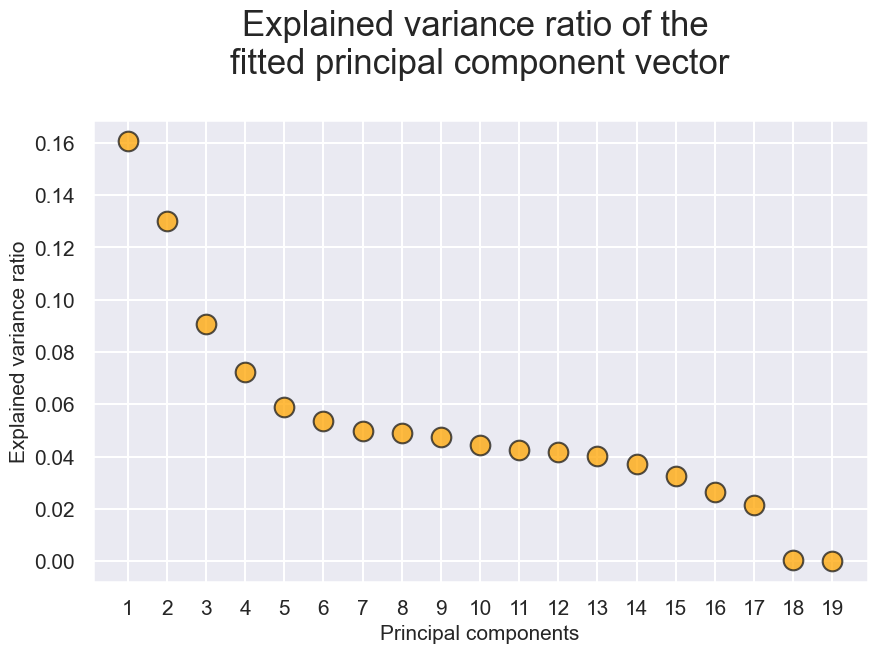

In [34]:
plt.figure(figsize=(10,6))
plt.scatter(x=[i+1 for i in range(len(dfx_pca.explained_variance_ratio_))],
            y=dfx_pca.explained_variance_ratio_,
           s=200, alpha=0.75,c='orange',edgecolor='k')
plt.grid(True)
plt.title("Explained variance ratio of the \nfitted principal component vector\n",fontsize=25)
plt.xlabel("Principal components",fontsize=15)
plt.xticks([i+1 for i in range(len(dfx_pca.explained_variance_ratio_))],fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Explained variance ratio",fontsize=15)
plt.show()

In [35]:
var_ratio = dfx_pca.explained_variance_ratio_


In [36]:
# add variance_ratio together
for i in range(len(var_ratio)-1):
    var_ratio[i+1] = var_ratio[i] + var_ratio[i+1]
    
# Change var_ratio to list
y_ratio = var_ratio.tolist()


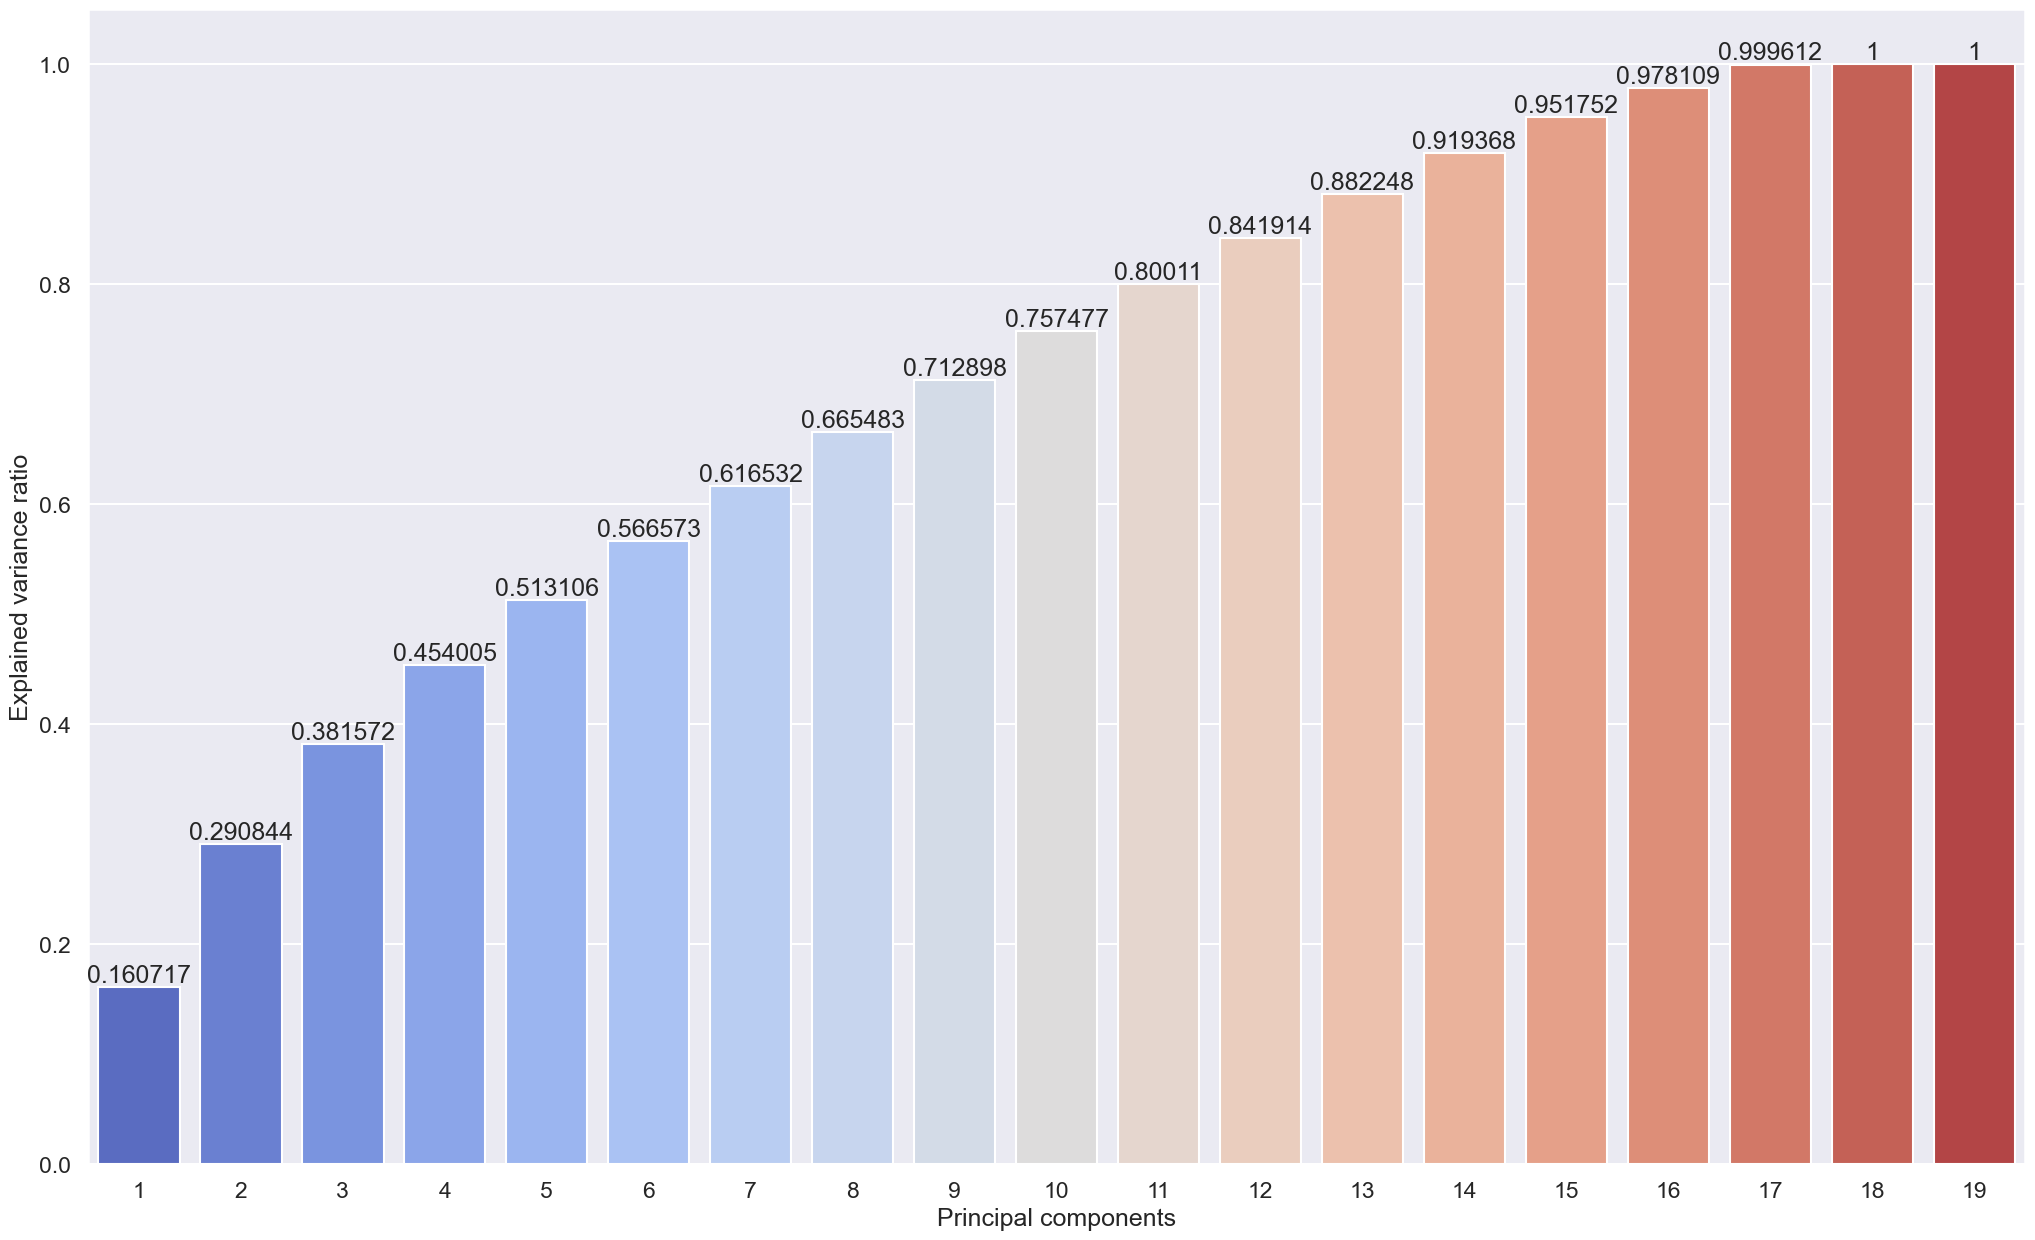

In [38]:
ax = sns.barplot(x=1+np.arange(len(y_ratio)), y=y_ratio, palette = 'coolwarm')
ax.bar_label(ax.containers[0])
plt.xlabel("Principal components")
plt.ylabel("Explained variance ratio")
plt.show()

In [39]:
# Let´s perform a component reduction to 14 variables
pca=PCA(n_components=14)
reduced=pca.fit_transform(df_scalefeature) 


In [40]:
re=pd.DataFrame(reduced)
re['Heart_Disease'] = data['Heart_Disease'].to_list()
re.to_csv('./data/pca_scaler.csv', sep=",", index=False)

In [41]:
re

0         1         2         3         4         5         6  \
0      -3.170019  0.570658 -1.048852 -2.855468  0.296369  2.145411 -0.413329   
1      -1.531060  1.102219  0.449579 -0.080593 -2.150428  0.980217 -0.595515   
2      -0.889941  0.782701  1.128936  0.494812 -1.230420  0.448036  0.420473   
3       1.434363  1.511302 -0.812050  1.042738 -0.979219  2.263482 -0.926101   
4       1.848763  0.808636 -1.156039 -1.557470 -1.169962  0.295879 -1.226340   
...          ...       ...       ...       ...       ...       ...       ...   
308766  1.129441 -1.325627  0.680603  0.324619 -1.030876 -0.350067 -0.468558   
308767  1.199795 -0.634092 -1.175648  0.466456  0.131602  2.367942 -0.914112   
308768 -1.571177 -0.705303  1.776713 -1.517101  1.286821  0.947243 -0.884173   
308769  1.346139 -1.201868 -0.932482  0.324716 -1.263765 -0.042469 -0.779070   
308770 -1.328384 -0.953726  1.311877  0.506987 -1.211119 -1.251288  0.122894   

               7         8         9        10        11        12        13  \
0       1.186202 -0.924026  1.053639 -1.289027 -0.238067  0.479869  0.001134   
1       1.124640  0.260449 -0.105237  1.086724  1.242489 -0.023888 -0.744161   
2       1.103469  1.405735 -0.602930  2.055844 -0.240712  0.888411 -0.240122   
3       0.068078  0.266673 -0.336790  1.434448  0.373696  0.713722  0.833188   
4       0.572849 -0.322285 -0.001934 -1.032062  0.299432 -1.641323 -0.120364   
...          ...       ...       ...       ...       ...       ...       ...   
308766 -0.658967  0.365319 -0.326173 -0.105684  0.230118 -0.184173 -0.187216   
308767  0.688323 -1.426350 -0.010666  2.080509  1.076348  1.328859  2.767799   
308768 -0.663066 -2.009059  0.342215  3.216375 -0.317596  0.997664 -0.278897   
308769 -0.492406  0.352558 -0.123832 -0.401664  0.131571 -0.094564  0.083791   
308770  0.326494  0.631465 -0.416053  0.145545 -0.359174 -0.424451  0.563983   

        Heart_Disease  
0                   0  
1                   1  
2                   0  
3                   1  
4                   0  
...               ...  
308766              0  
308767              0  
308768              0  
308769              0  
308770              0  

[308771 rows x 15 columns]